## Importing libraries

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from sklearn.neighbors import NearestNeighbors
import math
import seaborn as sn

In [2]:
import random
from scipy import ndarray

In [3]:
%config InlineBackend.figure_format = 'svg'

In [4]:
palette = ['paleturquoise','c']

## Import dataset

In [5]:
from collections import Counter
from imblearn.datasets import fetch_datasets
data = fetch_datasets()['ozone_level']

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.ensemble.bagging module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.ensemble.base module is  deprecated in version 0.22 and will be removed in

In [6]:
data.data.shape

(2536, 72)

In [7]:
len(data.data)

2536

In [8]:
def unison_shuffled_copies(a, b):
    np.random.seed(5)##change seed 1,2,3,4,5
    assert len(a) == len(b)
    p = np.random.permutation(len(a))
    return a[p], b[p]

In [9]:
data.data,data.target=unison_shuffled_copies(data.data, data.target)

## Initializing Results list

## Creating label and feature matrices

In [10]:
labels=data.target
print(np.unique(labels, return_counts = 1))

(array([-1,  1], dtype=int64), array([2463,   73], dtype=int64))


In [11]:
features=data.data
features.shape

(2536, 72)

In [12]:
n_feat=len(features[1])

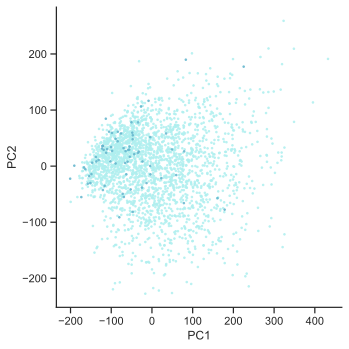

In [13]:
from sklearn.decomposition import PCA
import seaborn as sns
pca = PCA(n_components=2)
pc = pca.fit_transform(features)
result_baseline = pd.DataFrame(data = pc , 
        columns = ['PC1','PC2'])
result_baseline['Cluster'] = labels


sns.set(font_scale=1.2)
sns.set(rc={'figure.figsize':(12,10)})
sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})
sns.set_style("ticks", {"xtick.major.size": 8, "ytick.major.size": 8})


g_baseline=sns.lmplot( x="PC1", y="PC2",
  data=result_baseline, 
  fit_reg=False, 
  hue='Cluster', # color by cluster
  legend=False,
  scatter_kws={"s": 3}, palette= sns.color_palette(palette) ) # specify the point size


plt.grid(False)
plt.show()

## Dividing data into training and testing datasets

In [14]:
label_1=np.where(labels == 1)[0]
label_1=list(label_1)
len(label_1)

73

In [15]:
features_1=features[label_1]
features_1=np.take(features_1,np.random.permutation(features_1.shape[0]),axis=0,out=features_1)

In [16]:
label_0=np.where(labels == -1)[0]
label_0=list(label_0)
len(label_0)

2463

In [17]:
features_0=features[label_0]
features_0=np.take(features_0,np.random.permutation(features_0.shape[0]),axis=0,out=features_0)

In [18]:
a=len(features_1)//10
b=len(features_0)//10

In [19]:
fold_1_min=features_1[0:a]
fold_1_maj=features_0[0:b]
fold_1_tst=np.concatenate((fold_1_min,fold_1_maj))
lab_1_tst=np.concatenate((np.zeros(len(fold_1_min))+1, np.zeros(len(fold_1_maj))))

In [20]:
fold_2_min=features_1[a:2*a]
fold_2_maj=features_0[b:2*b]
fold_2_tst=np.concatenate((fold_2_min,fold_2_maj))
lab_2_tst=np.concatenate((np.zeros(len(fold_1_min))+1, np.zeros(len(fold_1_maj))))

In [21]:
fold_3_min=features_1[2*a:3*a]
fold_3_maj=features_0[2*b:3*b]
fold_3_tst=np.concatenate((fold_3_min,fold_3_maj))
lab_3_tst=np.concatenate((np.zeros(len(fold_1_min))+1, np.zeros(len(fold_1_maj))))

In [22]:
fold_4_min=features_1[3*a:4*a]
fold_4_maj=features_0[3*b:4*b]
fold_4_tst=np.concatenate((fold_4_min,fold_4_maj))
lab_4_tst=np.concatenate((np.zeros(len(fold_1_min))+1, np.zeros(len(fold_1_maj))))

In [23]:
fold_5_min=features_1[4*a:5*a]
fold_5_maj=features_0[4*b:5*b]
fold_5_tst=np.concatenate((fold_5_min,fold_5_maj))
lab_5_tst=np.concatenate((np.zeros(len(fold_1_min))+1, np.zeros(len(fold_1_maj))))

In [24]:
fold_6_min=features_1[5*a:6*a]
fold_6_maj=features_0[5*b:6*b]
fold_6_tst=np.concatenate((fold_6_min,fold_6_maj))
lab_6_tst=np.concatenate((np.zeros(len(fold_1_min))+1, np.zeros(len(fold_1_maj))))

In [25]:
fold_7_min=features_1[6*a:7*a]
fold_7_maj=features_0[6*b:7*b]
fold_7_tst=np.concatenate((fold_7_min,fold_7_maj))
lab_7_tst=np.concatenate((np.zeros(len(fold_1_min))+1, np.zeros(len(fold_1_maj))))

In [26]:
fold_8_min=features_1[7*a:8*a]
fold_8_maj=features_0[7*b:8*b]
fold_8_tst=np.concatenate((fold_8_min,fold_8_maj))
lab_8_tst=np.concatenate((np.zeros(len(fold_1_min))+1, np.zeros(len(fold_1_maj))))

In [27]:
fold_9_min=features_1[8*a:9*a]
fold_9_maj=features_0[8*b:9*b]
fold_9_tst=np.concatenate((fold_9_min,fold_9_maj))
lab_9_tst=np.concatenate((np.zeros(len(fold_1_min))+1, np.zeros(len(fold_1_maj))))

In [28]:
fold_10_min=features_1[9*a:]
fold_10_maj=features_0[9*b:]
fold_10_tst=np.concatenate((fold_10_min,fold_10_maj))
lab_10_tst=np.concatenate((np.zeros(len(fold_10_min))+1, np.zeros(len(fold_10_maj))))

In [29]:
fold_1_trn=np.concatenate((fold_2_min,fold_3_min,fold_4_min,fold_5_min,fold_6_min,fold_7_min,fold_8_min,fold_9_min,fold_10_min,fold_2_maj,fold_3_maj,fold_4_maj,fold_5_maj,fold_6_maj,fold_7_maj,fold_8_maj,fold_9_maj,fold_10_maj))

In [30]:
lab_1_trn=np.concatenate((np.zeros(8*a+len(fold_10_min))+1,np.zeros(8*b+len(fold_10_maj))))

In [31]:
fold_2_trn=np.concatenate((fold_1_min,fold_3_min,fold_4_min,fold_5_min,fold_6_min,fold_7_min,fold_8_min,fold_9_min,fold_10_min,fold_1_maj,fold_3_maj,fold_4_maj,fold_5_maj,fold_6_maj,fold_7_maj,fold_8_maj,fold_9_maj,fold_10_maj))

In [32]:
lab_2_trn=np.concatenate((np.zeros(8*a+len(fold_10_min))+1,np.zeros(8*b+len(fold_10_maj))))

In [33]:
fold_3_trn=np.concatenate((fold_2_min,fold_1_min,fold_4_min,fold_5_min,fold_6_min,fold_7_min,fold_8_min,fold_9_min,fold_10_min,fold_2_maj,fold_1_maj,fold_4_maj,fold_5_maj,fold_6_maj,fold_7_maj,fold_8_maj,fold_9_maj,fold_10_maj))

In [34]:
lab_3_trn=np.concatenate((np.zeros(8*a+len(fold_10_min))+1,np.zeros(8*b+len(fold_10_maj))))

In [35]:
fold_4_trn=np.concatenate((fold_2_min,fold_3_min,fold_1_min,fold_5_min,fold_6_min,fold_7_min,fold_8_min,fold_9_min,fold_10_min,fold_2_maj,fold_3_maj,fold_1_maj,fold_5_maj,fold_6_maj,fold_7_maj,fold_8_maj,fold_9_maj,fold_10_maj))

In [36]:
lab_4_trn=np.concatenate((np.zeros(8*a+len(fold_10_min))+1,np.zeros(8*b+len(fold_10_maj))))

In [37]:
fold_5_trn=np.concatenate((fold_2_min,fold_3_min,fold_4_min,fold_1_min,fold_6_min,fold_7_min,fold_8_min,fold_9_min,fold_10_min,fold_2_maj,fold_3_maj,fold_4_maj,fold_1_maj,fold_6_maj,fold_7_maj,fold_8_maj,fold_9_maj,fold_10_maj))

In [38]:
lab_5_trn=np.concatenate((np.zeros(8*a+len(fold_10_min))+1,np.zeros(8*b+len(fold_10_maj))))

In [39]:
fold_6_trn=np.concatenate((fold_2_min,fold_3_min,fold_4_min,fold_5_min,fold_1_min,fold_7_min,fold_8_min,fold_9_min,fold_10_min,fold_2_maj,fold_3_maj,fold_4_maj,fold_5_maj,fold_1_maj,fold_7_maj,fold_8_maj,fold_9_maj,fold_10_maj))

In [40]:
lab_6_trn=np.concatenate((np.zeros(8*a+len(fold_10_min))+1,np.zeros(8*b+len(fold_10_maj))))

In [41]:
fold_7_trn=np.concatenate((fold_2_min,fold_3_min,fold_4_min,fold_5_min,fold_6_min,fold_1_min,fold_8_min,fold_9_min,fold_10_min,fold_2_maj,fold_3_maj,fold_4_maj,fold_5_maj,fold_6_maj,fold_1_maj,fold_8_maj,fold_9_maj,fold_10_maj))

In [42]:
lab_7_trn=np.concatenate((np.zeros(8*a+len(fold_10_min))+1,np.zeros(8*b+len(fold_10_maj))))

In [43]:
fold_8_trn=np.concatenate((fold_2_min,fold_3_min,fold_4_min,fold_5_min,fold_6_min,fold_7_min,fold_1_min,fold_9_min,fold_10_min,fold_2_maj,fold_3_maj,fold_4_maj,fold_5_maj,fold_6_maj,fold_7_maj,fold_1_maj,fold_9_maj,fold_10_maj))

In [44]:
lab_8_trn=np.concatenate((np.zeros(8*a+len(fold_10_min))+1,np.zeros(8*b+len(fold_10_maj))))

In [45]:
fold_9_trn=np.concatenate((fold_2_min,fold_3_min,fold_4_min,fold_5_min,fold_6_min,fold_7_min,fold_8_min,fold_1_min,fold_10_min,fold_2_maj,fold_3_maj,fold_4_maj,fold_5_maj,fold_6_maj,fold_7_maj,fold_8_maj,fold_1_maj,fold_10_maj))

In [46]:
lab_9_trn=np.concatenate((np.zeros(8*a+len(fold_10_min))+1,np.zeros(8*b+len(fold_10_maj))))

In [47]:
fold_10_trn=np.concatenate((fold_2_min,fold_3_min,fold_4_min,fold_5_min,fold_6_min,fold_7_min,fold_8_min,fold_9_min,fold_1_min,fold_2_maj,fold_3_maj,fold_4_maj,fold_5_maj,fold_6_maj,fold_7_maj,fold_8_maj,fold_9_maj,fold_1_maj))

In [48]:
lab_10_trn=np.concatenate((np.zeros(9*a)+1,np.zeros(9*b)))


In [49]:
training_folds_feats=[fold_1_trn,fold_2_trn,fold_3_trn,fold_4_trn,fold_5_trn,fold_6_trn,fold_7_trn,fold_8_trn,fold_9_trn,fold_10_trn]

In [50]:
testing_folds_feats=[fold_1_tst,fold_2_tst,fold_3_tst,fold_4_tst,fold_5_tst,fold_6_tst,fold_7_tst,fold_8_tst,fold_9_tst,fold_10_tst]

In [51]:
training_folds_labels=[lab_1_trn,lab_2_trn,lab_3_trn,lab_4_trn,lab_5_trn,lab_6_trn,lab_7_trn,lab_8_trn,lab_9_trn,lab_10_trn]

In [52]:
testing_folds_labels=[lab_1_tst,lab_2_tst,lab_3_tst,lab_4_tst,lab_5_tst,lab_6_tst,lab_7_tst,lab_8_tst,lab_9_tst,lab_10_tst]

In [53]:
def lr(X_train,y_train,X_test,y_test):
    from sklearn import metrics
    from sklearn.linear_model import LogisticRegression
    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import average_precision_score
    from sklearn.metrics import f1_score
    from sklearn.metrics import balanced_accuracy_score
    from sklearn.metrics import cohen_kappa_score
    logreg = LogisticRegression(C=1e5, solver='lbfgs', multi_class='multinomial', class_weight={0: 1, 1: 1})
    logreg.fit(X_train, y_train)
    y_pred= logreg.predict(X_test)
    y_proba=logreg.predict_proba(X_test)[:, 1]
    con_mat=confusion_matrix(y_test,y_pred)
    bal_acc=balanced_accuracy_score(y_test,y_pred)
    tn, fp, fn, tp = con_mat.ravel()
    print('tn, fp, fn, tp:', tn, fp, fn, tp)
    f1 = f1_score(y_test, y_pred)
    kappa=cohen_kappa_score(y_test, y_pred)
    aps=average_precision_score(y_test,y_proba)
    print('balanced accuracy_LR:', bal_acc)
    print('f1 score_LR:', f1)
    print('kappa:',kappa)
    print('average_precision_score:', aps)
    print('confusion matrix_LR',con_mat)
    return(f1, bal_acc, aps, con_mat)

In [54]:
def svm(X_train,y_train,X_test,y_test):
    from sklearn import preprocessing
    from sklearn import metrics
    from sklearn import svm
    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import f1_score
    from sklearn.metrics import average_precision_score
    from sklearn.metrics import balanced_accuracy_score
    from sklearn.metrics import cohen_kappa_score
    X_train = preprocessing.scale(X_train)
    X_test = preprocessing.scale(X_test)
    svm= svm.SVC(kernel='linear', decision_function_shape='ovo', class_weight={0: 1., 1: 1.},probability=True)
    svm.fit(X_train, y_train)
    y_pred= svm.predict(X_test)
    y_proba=svm.predict_proba(X_test)[:, 1]
    con_mat=confusion_matrix(y_test,y_pred)
    bal_acc=balanced_accuracy_score(y_test,y_pred)
    aps=average_precision_score(y_test,y_proba)
    tn, fp, fn, tp = con_mat.ravel()
    print('tn, fp, fn, tp:', tn, fp, fn, tp)
    f1 = f1_score(y_test, y_pred)
    kappa=cohen_kappa_score(y_test, y_pred)
    print('balanced accuracy_SVM:', bal_acc)
    print('f1 score_SVM:', f1)
    print('kappa:',kappa)
    print('average_precision_score:', aps)
    print('confusion matrix_SVM',con_mat)
    return( f1, bal_acc , aps, con_mat)

In [55]:
def knn(X_train,y_train,X_test,y_test):
    from sklearn import metrics
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import f1_score
    from sklearn.metrics import average_precision_score
    from sklearn.metrics import balanced_accuracy_score
    from sklearn.metrics import cohen_kappa_score
    knn = KNeighborsClassifier(n_neighbors=10)
    knn.fit(X_train, y_train)
    y_pred= knn.predict(X_test)
    y_proba=knn.predict_proba(X_test)[:, 1]
    con_mat=confusion_matrix(y_test,y_pred)
    bal_acc=balanced_accuracy_score(y_test,y_pred)
    aps=average_precision_score(y_test,y_proba)
    tn, fp, fn, tp = con_mat.ravel()
    print('tn, fp, fn, tp:', tn, fp, fn, tp)
    print('balanced accuracy_KNN:', bal_acc)
    f1 = f1_score(y_test, y_pred)
    kappa=cohen_kappa_score(y_test, y_pred)
    print('f1 score_KNN:', f1)
    print('kappa:',kappa)
    print('average_precision_score:', aps)
    print('confusion matrix_KNN',con_mat)
    return(f1, bal_acc, aps, con_mat)

In [56]:
def Neb_grps(data,near_neb):
    nbrs = NearestNeighbors(n_neighbors=near_neb, algorithm='ball_tree').fit(data)
    distances, indices = nbrs.kneighbors(data)
    neb_class=[]
    for i in (indices):
        neb_class.append(i)
    return(np.asarray(neb_class)) 

def LoRAS(data,num_samples,shadow,sigma,num_RACOS,num_afcomb):
    np.random.seed(42)
    data_shadow=([])
    for i in range (num_samples):
        c=0
        while c<shadow:
            data_shadow.append(data[i]+np.random.normal(0,sigma))
            c=c+1
    data_shadow==np.asarray(data_shadow)
    data_shadow_lc=([])
    for i in range(num_RACOS):
        idx = np.random.randint(shadow*num_samples, size=num_afcomb)
        w=np.random.randint(100, size=len(idx))
        aff_w=np.asarray(w/sum(w))
        data_tsl=np.array(data_shadow)[idx,:]
        data_tsl_=np.dot(aff_w, data_tsl)
        data_shadow_lc.append(data_tsl_)
    return(np.asarray(data_shadow_lc))   

def LoRAS_gen(num_samples,shadow,sigma,num_RACOS,num_afcomb):
    RACOS_set=[]
    for i in range (len(nb_list)):
        RACOS_i= LoRAS(features_1_trn[nb_list[i]],num_samples,shadow,sigma,num_RACOS,num_afcomb)
        RACOS_set.append(RACOS_i)
    LoRAS_set=np.asarray(RACOS_set)
    LoRAS_1=np.reshape(LoRAS_set,(len(features_1_trn)*num_RACOS,n_feat))
    return(np.concatenate((LoRAS_1,features_1_trn)))

In [57]:
import smote_variants as sv
from imblearn.over_sampling import SMOTE, BorderlineSMOTE, SVMSMOTE 

In [58]:
def OVS(training_data,training_labels,neb):
    
    smote_mot2ld = sv.MOT2LD(random_state=62, k = neb)
    SMOTE_feat_mot2ld, SMOTE_labels_mot2ld = smote_mot2ld.sample(training_data, training_labels)
    
    smote_dbsmote = sv.DBSMOTE(random_state=62, )
    SMOTE_feat_dbsmote, SMOTE_labels_dbsmote = smote_dbsmote.sample(training_data, training_labels)
    
    smote_cure = sv.CURE_SMOTE(random_state=62, )
    SMOTE_feat_cure, SMOTE_labels_cure = smote_cure.sample(training_data, training_labels)
    
    smote_SOMO = sv.SOMO(random_state=62)
    SMOTE_feat_SOMO, SMOTE_labels_SOMO = smote_SOMO.sample(training_data, training_labels)
    
    sm = SMOTE(random_state=62, k_neighbors=neb, sampling_strategy=1)
    SMOTE_feat, SMOTE_labels = sm.fit_resample(training_data,training_labels)
    
    
    return(SMOTE_feat, SMOTE_labels, SMOTE_feat_mot2ld, SMOTE_labels_mot2ld, SMOTE_feat_dbsmote, SMOTE_labels_dbsmote,\
          SMOTE_feat_cure, SMOTE_labels_cure, SMOTE_feat_SOMO, SMOTE_labels_SOMO)

In [59]:
LR=[]
SVM=[]
KNN=[] 
LR_SM=[]
SVM_SM=[]
KNN_SM=[]
LR_MOT2TLD=[]
SVM_MOT2TLD=[]
KNN_MOT2TLD=[] 
LR_DBSMOTE=[]
SVM_DBSMOTE=[]
KNN_DBSMOTE=[] 
LR_CURE=[]
SVM_CURE=[]
KNN_CURE=[] 
LR_SOMO=[]
SVM_SOMO=[]
KNN_SOMO=[] 



i=0
while i<10:
    SMOTE_feat, SMOTE_labels, SMOTE_feat_mot2ld, SMOTE_labels_mot2ld, SMOTE_feat_dbsmote, SMOTE_labels_dbsmote, SMOTE_feat_cure, SMOTE_labels_cure, SMOTE_feat_SOMO, SMOTE_labels_SOMO=OVS(training_folds_feats[i],training_folds_labels[i],5)
    
    f1_lr, bal_acc_lr, aps_lr, mat_lr=lr(training_folds_feats[i],training_folds_labels[i],testing_folds_feats[i],testing_folds_labels[i])
    LR.append([f1_lr, aps_lr, bal_acc_lr])
    f1_svm,bal_acc_svm,aps_svm,mat_svm=svm(training_folds_feats[i],training_folds_labels[i],testing_folds_feats[i],testing_folds_labels[i])
    SVM.append([f1_svm,bal_acc_svm,aps_svm])
    f1_knn,bal_acc_knn,aps_knn,mat_knn=knn(training_folds_feats[i],training_folds_labels[i],testing_folds_feats[i],testing_folds_labels[i])
    KNN.append([f1_knn,bal_acc_knn,aps_knn])
    
    f1_lr_SMOTE,bal_acc_lr_SMOTE, aps_lr_SMOTE, mat_lr_SMOTE=lr(SMOTE_feat,SMOTE_labels,testing_folds_feats[i],testing_folds_labels[i])
    LR_SM.append([f1_lr_SMOTE, bal_acc_lr_SMOTE, aps_lr_SMOTE])
    f1_svm_SMOTE,bal_acc_svm_SMOTE,aps_svm_SMOTE,mat_svm_SMOTE=svm(SMOTE_feat,SMOTE_labels,testing_folds_feats[i],testing_folds_labels[i])
    SVM_SM.append([f1_svm_SMOTE, bal_acc_svm_SMOTE, aps_svm_SMOTE])
    f1_knn_SMOTE,bal_acc_knn_SMOTE, aps_knn_SMOTE, mat_knn_SMOTE=knn(SMOTE_feat,SMOTE_labels,testing_folds_feats[i],testing_folds_labels[i])
    KNN_SM.append([f1_knn_SMOTE,bal_acc_knn_SMOTE,aps_knn_SMOTE])
        
    f1_lr_SMOTE_mot2ld,bal_acc_lr_SMOTE_mot2ld, aps_lr_SMOTE_mot2ld, mat_lr_SMOTE_mot2ld=lr(SMOTE_feat_mot2ld,SMOTE_labels_mot2ld,testing_folds_feats[i],testing_folds_labels[i])
    LR_MOT2TLD.append([f1_lr_SMOTE_mot2ld,bal_acc_lr_SMOTE_mot2ld, aps_lr_SMOTE_mot2ld])
    f1_svm_SMOTE_mot2ld,bal_acc_svm_SMOTE_mot2ld, aps_svm_SMOTE_mot2ld, mat_svm_SMOTE_mot2ld=svm(SMOTE_feat_mot2ld,SMOTE_labels_mot2ld,testing_folds_feats[i],testing_folds_labels[i])
    SVM_MOT2TLD.append([f1_svm_SMOTE_mot2ld,bal_acc_svm_SMOTE_mot2ld, aps_svm_SMOTE_mot2ld])
    f1_knn_SMOTE_mot2ld,bal_acc_knn_SMOTE_mot2ld, aps_knn_SMOTE_mot2ld, mat_knn_SMOTE_mot2ld=knn(SMOTE_feat_mot2ld,SMOTE_labels_mot2ld,testing_folds_feats[i],testing_folds_labels[i])
    KNN_MOT2TLD.append([f1_knn_SMOTE_mot2ld,bal_acc_knn_SMOTE_mot2ld, aps_knn_SMOTE_mot2ld])
    
    f1_lr_SMOTE_dbsmote,bal_acc_lr_SMOTE_dbsmote, aps_lr_SMOTE_dbsmote, mat_lr_SMOTE_dbsmote=lr(SMOTE_feat_dbsmote,SMOTE_labels_dbsmote,testing_folds_feats[i],testing_folds_labels[i])
    LR_DBSMOTE.append([f1_lr_SMOTE_dbsmote,bal_acc_lr_SMOTE_dbsmote, aps_lr_SMOTE_dbsmote])
    f1_svm_SMOTE_dbsmote,bal_acc_svm_SMOTE_dbsmote, aps_svm_SMOTE_dbsmote, mat_svm_SMOTE_dbsmote=svm(SMOTE_feat_dbsmote,SMOTE_labels_dbsmote,testing_folds_feats[i],testing_folds_labels[i])
    SVM_DBSMOTE.append([f1_svm_SMOTE_dbsmote,bal_acc_svm_SMOTE_dbsmote, aps_svm_SMOTE_dbsmote])
    f1_knn_SMOTE_dbsmote,bal_acc_knn_SMOTE_dbsmote,aps_knn_SMOTE_dbsmote,mat_knn_SMOTE_dbsmote=knn(SMOTE_feat_dbsmote,SMOTE_labels_dbsmote,testing_folds_feats[i],testing_folds_labels[i])
    KNN_DBSMOTE.append([f1_knn_SMOTE_dbsmote,bal_acc_knn_SMOTE_dbsmote,aps_knn_SMOTE_dbsmote])
    
    f1_lr_SMOTE_cure,bal_acc_lr_SMOTE_cure,aps_lr_SMOTE_cure,mat_lr_SMOTE_cure=lr(SMOTE_feat_cure, SMOTE_labels_cure,testing_folds_feats[i],testing_folds_labels[i])
    LR_CURE.append([f1_lr_SMOTE_cure,bal_acc_lr_SMOTE_cure,aps_lr_SMOTE_cure])
    f1_svm_SMOTE_cure,bal_acc_svm_SMOTE_cure,aps_svm_SMOTE_cure,mat_svm_SMOTE_cure=svm(SMOTE_feat_cure, SMOTE_labels_cure,testing_folds_feats[i],testing_folds_labels[i])
    SVM_CURE.append([f1_svm_SMOTE_cure,bal_acc_svm_SMOTE_cure,aps_svm_SMOTE_cure])
    f1_knn_SMOTE_cure,bal_acc_knn_SMOTE_cure,aps_knn_SMOTE_cure,mat_knn_SMOTE_cure=knn(SMOTE_feat_cure, SMOTE_labels_cure,testing_folds_feats[i],testing_folds_labels[i])
    KNN_CURE.append([f1_knn_SMOTE_cure,bal_acc_knn_SMOTE_cure,aps_knn_SMOTE_cure])
    
    f1_lr_SMOTE_SOMO,bal_acc_lr_SMOTE_SOMO,aps_lr_SMOTE_SOMO,mat_lr_SMOTE_SOMO=lr(SMOTE_feat_SOMO, SMOTE_labels_SOMO,testing_folds_feats[i],testing_folds_labels[i])
    LR_SOMO.append([f1_lr_SMOTE_SOMO,bal_acc_lr_SMOTE_SOMO,aps_lr_SMOTE_SOMO])
    f1_svm_SMOTE_SOMO,bal_acc_svm_SMOTE_SOMO,aps_svm_SMOTE_SOMO,mat_svm_SMOTE_SOMO=svm(SMOTE_feat_SOMO, SMOTE_labels_SOMO,testing_folds_feats[i],testing_folds_labels[i])
    SVM_SOMO.append([f1_svm_SMOTE_SOMO,bal_acc_svm_SMOTE_SOMO,aps_svm_SMOTE_SOMO])
    f1_knn_SMOTE_SOMO,bal_acc_knn_SMOTE_SOMO,aps_knn_SMOTE_SOMO,mat_knn_SMOTE_SOMO=knn(SMOTE_feat_SOMO, SMOTE_labels_SOMO,testing_folds_feats[i],testing_folds_labels[i])
    KNN_SOMO.append([f1_knn_SMOTE_SOMO,bal_acc_knn_SMOTE_SOMO,aps_knn_SMOTE_SOMO])

    i=i+1

2020-10-27 13:05:54,273:INFO:MOT2LD: Running sampling via ('MOT2LD', "{'proportion': 1.0, 'n_components': 2, 'k': 5, 'd_cut': 'auto', 'n_jobs': 1, 'random_state': 62}")
2020-10-27 13:05:54,275:INFO:MOT2LD: starting TSNE n: 2283 d: 72


[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 2283 samples in 0.026s...
[t-SNE] Computed neighbors for 2283 samples in 0.260s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2283
[t-SNE] Computed conditional probabilities for sample 2000 / 2283
[t-SNE] Computed conditional probabilities for sample 2283 / 2283
[t-SNE] Mean sigma: 12.532242
[t-SNE] Computed conditional probabilities in 0.050s
[t-SNE] Iteration 50: error = 92.7852631, gradient norm = 0.0587289 (50 iterations in 0.760s)
[t-SNE] Iteration 100: error = 81.3707352, gradient norm = 0.0436461 (50 iterations in 0.516s)
[t-SNE] Iteration 150: error = 79.5410919, gradient norm = 0.0227117 (50 iterations in 0.502s)
[t-SNE] Iteration 200: error = 79.2616119, gradient norm = 0.0117371 (50 iterations in 0.499s)
[t-SNE] Iteration 250: error = 79.2124176, gradient norm = 0.0161792 (50 iterations in 0.551s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 79.212418
[t-SNE] Iteration 300: err

2020-10-27 13:06:00,094:INFO:MOT2LD: TSNE finished
2020-10-27 13:06:00,284:INFO:DBSMOTE: Running sampling via ('DBSMOTE', "{'proportion': 1.0, 'eps': 0.8, 'min_samples': 3, 'n_jobs': 1, 'random_state': 62}")


[t-SNE] Iteration 500: error = 1.4048238, gradient norm = 0.0002139 (50 iterations in 0.579s)
[t-SNE] KL divergence after 500 iterations: 1.404824


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass min_samples=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
2020-10-27 13:06:00,296:INFO:DBSMOTE: Number of clusters is 0, trying to increase eps and decrease min_samples
2020-10-27 13:06:00,296:INFO:DBSMOTE: Running sampling via ('DBSMOTE', "{'proportion': 1.0, 'eps': 1.2000000000000002, 'min_samples': 2, 'n_jobs': 1, 'random_state': <mtrand.RandomState object at 0x0000019D5270AA48>}")
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass min_samples=2 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
2020-10-27 13:06:00,307:INFO:DBSMOTE: Number of clusters is 0, trying to increase eps and decrease min_samples
2020-10-27 13:06:00,309:INFO:DBSMOTE: Number of clusters is 0, can't adjust parameters further
2020-10-27 13:06:0

tn, fp, fn, tp: 246 0 6 1
balanced accuracy_LR: 0.5714285714285714
f1 score_LR: 0.25
kappa: 0.24477611940298505
average_precision_score: 0.35406429789546673
confusion matrix_LR [[246   0]
 [  6   1]]
tn, fp, fn, tp: 246 0 7 0
balanced accuracy_SVM: 0.5
f1 score_SVM: 0.0
kappa: 0.0
average_precision_score: 0.1533271828286901
confusion matrix_SVM [[246   0]
 [  7   0]]
tn, fp, fn, tp: 246 0 7 0
balanced accuracy_KNN: 0.5
f1 score_KNN: 0.0
kappa: 0.0
average_precision_score: 0.03391892859131071
confusion matrix_KNN [[246   0]
 [  7   0]]


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


tn, fp, fn, tp: 188 58 1 6
balanced accuracy_LR: 0.81068524970964
f1 score_LR: 0.16901408450704225
kappa: 0.12538817601218732
average_precision_score: 0.32321088380670104
confusion matrix_LR [[188  58]
 [  1   6]]
tn, fp, fn, tp: 155 91 1 6
balanced accuracy_SVM: 0.7436120789779326
f1 score_SVM: 0.11538461538461539
kappa: 0.06724372846036719
average_precision_score: 0.1987737919094926
confusion matrix_SVM [[155  91]
 [  1   6]]
tn, fp, fn, tp: 189 57 5 2
balanced accuracy_KNN: 0.5270034843205575
f1 score_KNN: 0.060606060606060594
kappa: 0.011718749999999889
average_precision_score: 0.04763460443290681
confusion matrix_KNN [[189  57]
 [  5   2]]


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


tn, fp, fn, tp: 203 43 1 6
balanced accuracy_LR: 0.8411730545876888
f1 score_LR: 0.21428571428571427
kappa: 0.17430648271769755
average_precision_score: 0.3074314574314574
confusion matrix_LR [[203  43]
 [  1   6]]
tn, fp, fn, tp: 180 66 1 6
balanced accuracy_SVM: 0.7944250871080138
f1 score_SVM: 0.1518987341772152
kappa: 0.10685494493914327
average_precision_score: 0.22463716407815784
confusion matrix_SVM [[180  66]
 [  1   6]]
tn, fp, fn, tp: 225 21 5 2
balanced accuracy_KNN: 0.6001742160278746
f1 score_KNN: 0.13333333333333333
kappa: 0.09493670886075944
average_precision_score: 0.05656119243075765
confusion matrix_KNN [[225  21]
 [  5   2]]


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


tn, fp, fn, tp: 246 0 6 1
balanced accuracy_LR: 0.5714285714285714
f1 score_LR: 0.25
kappa: 0.24477611940298505
average_precision_score: 0.35406429789546673
confusion matrix_LR [[246   0]
 [  6   1]]
tn, fp, fn, tp: 246 0 7 0
balanced accuracy_SVM: 0.5
f1 score_SVM: 0.0
kappa: 0.0
average_precision_score: 0.1533271828286901
confusion matrix_SVM [[246   0]
 [  7   0]]
tn, fp, fn, tp: 246 0 7 0
balanced accuracy_KNN: 0.5
f1 score_KNN: 0.0
kappa: 0.0
average_precision_score: 0.03391892859131071
confusion matrix_KNN [[246   0]
 [  7   0]]


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


tn, fp, fn, tp: 210 36 2 5
balanced accuracy_LR: 0.7839721254355401
f1 score_LR: 0.20833333333333334
kappa: 0.16905790838375112
average_precision_score: 0.3426902902170009
confusion matrix_LR [[210  36]
 [  2   5]]
tn, fp, fn, tp: 163 83 1 6
balanced accuracy_SVM: 0.7598722415795587
f1 score_SVM: 0.12499999999999999
kappa: 0.07768422879958337
average_precision_score: 0.18018112029190178
confusion matrix_SVM [[163  83]
 [  1   6]]
tn, fp, fn, tp: 191 55 3 4
balanced accuracy_KNN: 0.6739256678281068
f1 score_KNN: 0.12121212121212119
kappa: 0.07547883064516114
average_precision_score: 0.09313316351037773
confusion matrix_KNN [[191  55]
 [  3   4]]


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


tn, fp, fn, tp: 246 0 6 1
balanced accuracy_LR: 0.5714285714285714
f1 score_LR: 0.25
kappa: 0.24477611940298505
average_precision_score: 0.35406429789546673
confusion matrix_LR [[246   0]
 [  6   1]]


2020-10-27 13:06:12,060:INFO:MOT2LD: Running sampling via ('MOT2LD', "{'proportion': 1.0, 'n_components': 2, 'k': 5, 'd_cut': 'auto', 'n_jobs': 1, 'random_state': 62}")
2020-10-27 13:06:12,060:INFO:MOT2LD: starting TSNE n: 2283 d: 72


tn, fp, fn, tp: 246 0 7 0
balanced accuracy_SVM: 0.5
f1 score_SVM: 0.0
kappa: 0.0
average_precision_score: 0.1533271828286901
confusion matrix_SVM [[246   0]
 [  7   0]]
tn, fp, fn, tp: 246 0 7 0
balanced accuracy_KNN: 0.5
f1 score_KNN: 0.0
kappa: 0.0
average_precision_score: 0.03391892859131071
confusion matrix_KNN [[246   0]
 [  7   0]]
[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 2283 samples in 0.032s...
[t-SNE] Computed neighbors for 2283 samples in 0.248s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2283
[t-SNE] Computed conditional probabilities for sample 2000 / 2283
[t-SNE] Computed conditional probabilities for sample 2283 / 2283
[t-SNE] Mean sigma: 12.209813
[t-SNE] Computed conditional probabilities in 0.064s
[t-SNE] Iteration 50: error = 92.8439407, gradient norm = 0.0386432 (50 iterations in 0.971s)
[t-SNE] Iteration 100: error = 81.2571945, gradient norm = 0.0553143 (50 iterations in 0.786s)
[t-SNE] Iteration 150: error = 79.6231461, gradi

2020-10-27 13:06:18,789:INFO:MOT2LD: TSNE finished
2020-10-27 13:06:18,958:INFO:DBSMOTE: Running sampling via ('DBSMOTE', "{'proportion': 1.0, 'eps': 0.8, 'min_samples': 3, 'n_jobs': 1, 'random_state': 62}")
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass min_samples=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
2020-10-27 13:06:18,966:INFO:DBSMOTE: Number of clusters is 0, trying to increase eps and decrease min_samples
2020-10-27 13:06:18,966:INFO:DBSMOTE: Running sampling via ('DBSMOTE', "{'proportion': 1.0, 'eps': 1.2000000000000002, 'min_samples': 2, 'n_jobs': 1, 'random_state': <mtrand.RandomState object at 0x0000019D5290FF48>}")
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass min_samples=2 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
2020-10-27 13:06

[t-SNE] Iteration 500: error = 1.4049160, gradient norm = 0.0002075 (50 iterations in 0.406s)
[t-SNE] KL divergence after 500 iterations: 1.404916


2020-10-27 13:06:18,975:INFO:DBSMOTE: Number of clusters is 0, can't adjust parameters further
2020-10-27 13:06:18,977:INFO:CURE_SMOTE: Running sampling via ('CURE_SMOTE', "{'proportion': 1.0, 'n_clusters': 5, 'noise_th': 2, 'n_jobs': 1, 'random_state': 62}")
2020-10-27 13:06:19,080:INFO:SOMO: Running sampling via ('SOMO', "{'proportion': 1.0, 'n_grid': 10, 'sigma': 0.2, 'learning_rate': 0.5, 'n_iter': 100, 'n_jobs': 1, 'random_state': 62}")
2020-10-27 13:06:19,171:WARNING:SOMO: all clusters filtered
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale 

tn, fp, fn, tp: 246 0 7 0
balanced accuracy_LR: 0.5
f1 score_LR: 0.0
kappa: 0.0
average_precision_score: 0.2537805052090766
confusion matrix_LR [[246   0]
 [  7   0]]
tn, fp, fn, tp: 246 0 7 0
balanced accuracy_SVM: 0.5
f1 score_SVM: 0.0
kappa: 0.0
average_precision_score: 0.34306465291686966
confusion matrix_SVM [[246   0]
 [  7   0]]
tn, fp, fn, tp: 246 0 7 0
balanced accuracy_KNN: 0.5
f1 score_KNN: 0.0
kappa: 0.0
average_precision_score: 0.16763252003526602
confusion matrix_KNN [[246   0]
 [  7   0]]


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


tn, fp, fn, tp: 192 54 0 7
balanced accuracy_LR: 0.8902439024390244
f1 score_LR: 0.2058823529411765
kappa: 0.1644036697247706
average_precision_score: 0.26319795492513703
confusion matrix_LR [[192  54]
 [  0   7]]
tn, fp, fn, tp: 153 93 0 7
balanced accuracy_SVM: 0.8109756097560976
f1 score_SVM: 0.13084112149532712
kappa: 0.08344045810447598
average_precision_score: 0.22849109091345116
confusion matrix_SVM [[153  93]
 [  0   7]]
tn, fp, fn, tp: 196 50 6 1
balanced accuracy_KNN: 0.46980255516840885
f1 score_KNN: 0.034482758620689655
kappa: -0.01489971346704877
average_precision_score: 0.04859240138743244
confusion matrix_KNN [[196  50]
 [  6   1]]


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


tn, fp, fn, tp: 211 35 1 6
balanced accuracy_LR: 0.8574332171893146
f1 score_LR: 0.25
kappa: 0.2127917026793431
average_precision_score: 0.1623732211967506
confusion matrix_LR [[211  35]
 [  1   6]]
tn, fp, fn, tp: 180 66 0 7
balanced accuracy_SVM: 0.8658536585365854
f1 score_SVM: 0.175
kappa: 0.13112706837340005
average_precision_score: 0.24320006790595022
confusion matrix_SVM [[180  66]
 [  0   7]]
tn, fp, fn, tp: 222 24 6 1
balanced accuracy_KNN: 0.5226480836236934
f1 score_KNN: 0.0625
kappa: 0.020139426800929616
average_precision_score: 0.0456183955795757
confusion matrix_KNN [[222  24]
 [  6   1]]


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


tn, fp, fn, tp: 246 0 7 0
balanced accuracy_LR: 0.5
f1 score_LR: 0.0
kappa: 0.0
average_precision_score: 0.2537805052090766
confusion matrix_LR [[246   0]
 [  7   0]]
tn, fp, fn, tp: 246 0 7 0
balanced accuracy_SVM: 0.5
f1 score_SVM: 0.0
kappa: 0.0
average_precision_score: 0.34858189429618003
confusion matrix_SVM [[246   0]
 [  7   0]]
tn, fp, fn, tp: 246 0 7 0
balanced accuracy_KNN: 0.5
f1 score_KNN: 0.0
kappa: 0.0
average_precision_score: 0.16763252003526602
confusion matrix_KNN [[246   0]
 [  7   0]]


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


tn, fp, fn, tp: 211 35 1 6
balanced accuracy_LR: 0.8574332171893146
f1 score_LR: 0.25
kappa: 0.2127917026793431
average_precision_score: 0.27660320225651236
confusion matrix_LR [[211  35]
 [  1   6]]
tn, fp, fn, tp: 162 84 0 7
balanced accuracy_SVM: 0.8292682926829269
f1 score_SVM: 0.14285714285714288
kappa: 0.09642857142857131
average_precision_score: 0.4536752136752137
confusion matrix_SVM [[162  84]
 [  0   7]]
tn, fp, fn, tp: 201 45 2 5
balanced accuracy_KNN: 0.7656794425087108
f1 score_KNN: 0.1754385964912281
kappa: 0.13337220319218723
average_precision_score: 0.09495233192068986
confusion matrix_KNN [[201  45]
 [  2   5]]


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


tn, fp, fn, tp: 246 0 7 0
balanced accuracy_LR: 0.5
f1 score_LR: 0.0
kappa: 0.0
average_precision_score: 0.2537805052090766
confusion matrix_LR [[246   0]
 [  7   0]]


2020-10-27 13:06:30,976:INFO:MOT2LD: Running sampling via ('MOT2LD', "{'proportion': 1.0, 'n_components': 2, 'k': 5, 'd_cut': 'auto', 'n_jobs': 1, 'random_state': 62}")
2020-10-27 13:06:30,977:INFO:MOT2LD: starting TSNE n: 2283 d: 72


tn, fp, fn, tp: 246 0 7 0
balanced accuracy_SVM: 0.5
f1 score_SVM: 0.0
kappa: 0.0
average_precision_score: 0.34306465291686966
confusion matrix_SVM [[246   0]
 [  7   0]]
tn, fp, fn, tp: 246 0 7 0
balanced accuracy_KNN: 0.5
f1 score_KNN: 0.0
kappa: 0.0
average_precision_score: 0.16763252003526602
confusion matrix_KNN [[246   0]
 [  7   0]]
[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 2283 samples in 0.030s...
[t-SNE] Computed neighbors for 2283 samples in 0.250s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2283
[t-SNE] Computed conditional probabilities for sample 2000 / 2283
[t-SNE] Computed conditional probabilities for sample 2283 / 2283
[t-SNE] Mean sigma: 11.956787
[t-SNE] Computed conditional probabilities in 0.069s
[t-SNE] Iteration 50: error = 92.2452850, gradient norm = 0.1026123 (50 iterations in 0.883s)
[t-SNE] Iteration 100: error = 80.4305344, gradient norm = 0.0354116 (50 iterations in 0.633s)
[t-SNE] Iteration 150: error = 79.4471130, grad

2020-10-27 13:06:38,307:INFO:MOT2LD: TSNE finished


[t-SNE] Iteration 500: error = 1.4083197, gradient norm = 0.0002050 (50 iterations in 0.739s)
[t-SNE] KL divergence after 500 iterations: 1.408320


2020-10-27 13:06:38,534:INFO:DBSMOTE: Running sampling via ('DBSMOTE', "{'proportion': 1.0, 'eps': 0.8, 'min_samples': 3, 'n_jobs': 1, 'random_state': 62}")
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass min_samples=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
2020-10-27 13:06:38,547:INFO:DBSMOTE: Number of clusters is 0, trying to increase eps and decrease min_samples
2020-10-27 13:06:38,547:INFO:DBSMOTE: Running sampling via ('DBSMOTE', "{'proportion': 1.0, 'eps': 1.2000000000000002, 'min_samples': 2, 'n_jobs': 1, 'random_state': <mtrand.RandomState object at 0x0000019D52951B38>}")
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass min_samples=2 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
2020-10-27 13:06:38,557:INFO:DBSMOTE: Number of clusters is 0, tryi

tn, fp, fn, tp: 246 0 7 0
balanced accuracy_LR: 0.5
f1 score_LR: 0.0
kappa: 0.0
average_precision_score: 0.22537718057520037
confusion matrix_LR [[246   0]
 [  7   0]]
tn, fp, fn, tp: 246 0 7 0
balanced accuracy_SVM: 0.5
f1 score_SVM: 0.0
kappa: 0.0
average_precision_score: 0.41047289883695415
confusion matrix_SVM [[246   0]
 [  7   0]]
tn, fp, fn, tp: 246 0 7 0
balanced accuracy_KNN: 0.5
f1 score_KNN: 0.0
kappa: 0.0
average_precision_score: 0.05581375146592538
confusion matrix_KNN [[246   0]
 [  7   0]]


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


tn, fp, fn, tp: 203 43 1 6
balanced accuracy_LR: 0.8411730545876888
f1 score_LR: 0.21428571428571427
kappa: 0.17430648271769755
average_precision_score: 0.2381336405529954
confusion matrix_LR [[203  43]
 [  1   6]]
tn, fp, fn, tp: 154 92 0 7
balanced accuracy_SVM: 0.8130081300813008
f1 score_SVM: 0.1320754716981132
kappa: 0.08477508650519028
average_precision_score: 0.5435374149659864
confusion matrix_SVM [[154  92]
 [  0   7]]
tn, fp, fn, tp: 199 47 4 3
balanced accuracy_KNN: 0.6187572590011614
f1 score_KNN: 0.10526315789473684
kappa: 0.05961664601705419
average_precision_score: 0.06459378506455987
confusion matrix_KNN [[199  47]
 [  4   3]]


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


tn, fp, fn, tp: 210 36 4 3
balanced accuracy_LR: 0.6411149825783972
f1 score_LR: 0.13043478260869565
kappa: 0.08763072484673629
average_precision_score: 0.09370811964480569
confusion matrix_LR [[210  36]
 [  4   3]]
tn, fp, fn, tp: 175 71 1 6
balanced accuracy_SVM: 0.7842624854819977
f1 score_SVM: 0.14285714285714285
kappa: 0.09705561613958547
average_precision_score: 0.14193502575855518
confusion matrix_SVM [[175  71]
 [  1   6]]
tn, fp, fn, tp: 224 22 7 0
balanced accuracy_KNN: 0.45528455284552843
f1 score_KNN: 0.0
kappa: -0.04381846635367759
average_precision_score: 0.04174086782782435
confusion matrix_KNN [[224  22]
 [  7   0]]


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


tn, fp, fn, tp: 246 0 7 0
balanced accuracy_LR: 0.5
f1 score_LR: 0.0
kappa: 0.0
average_precision_score: 0.22537718057520037
confusion matrix_LR [[246   0]
 [  7   0]]
tn, fp, fn, tp: 246 0 7 0
balanced accuracy_SVM: 0.5
f1 score_SVM: 0.0
kappa: 0.0
average_precision_score: 0.41047289883695415
confusion matrix_SVM [[246   0]
 [  7   0]]
tn, fp, fn, tp: 246 0 7 0
balanced accuracy_KNN: 0.5
f1 score_KNN: 0.0
kappa: 0.0
average_precision_score: 0.05581375146592538
confusion matrix_KNN [[246   0]
 [  7   0]]


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


tn, fp, fn, tp: 220 26 1 6
balanced accuracy_LR: 0.8757259001161439
f1 score_LR: 0.30769230769230765
kappa: 0.27476377534770147
average_precision_score: 0.26643219312377453
confusion matrix_LR [[220  26]
 [  1   6]]
tn, fp, fn, tp: 169 77 0 7
balanced accuracy_SVM: 0.8434959349593496
f1 score_SVM: 0.15384615384615385
kappa: 0.10829862223646258
average_precision_score: 0.283339874411303
confusion matrix_SVM [[169  77]
 [  0   7]]
tn, fp, fn, tp: 202 44 5 2
balanced accuracy_KNN: 0.5534262485481998
f1 score_KNN: 0.07547169811320756
kappa: 0.028828828828828756
average_precision_score: 0.04125771769509602
confusion matrix_KNN [[202  44]
 [  5   2]]
tn, fp, fn, tp: 246 0 7 0
balanced accuracy_LR: 0.5
f1 score_LR: 0.0
kappa: 0.0
average_precision_score: 0.22537718057520037
confusion matrix_LR [[246   0]
 [  7   0]]


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
2020-10-27 13:06:53,738:INFO:MOT2LD: Running sampling via ('MOT2LD', "{'proportion': 1.0, 'n_components': 2, 'k': 5, 'd_cut': 'auto', 'n_jobs': 1, 'random_state': 62}")
2020-10-27 13:06:53,740:INFO:MOT2LD: starting TSNE n: 2283 d: 72


tn, fp, fn, tp: 246 0 7 0
balanced accuracy_SVM: 0.5
f1 score_SVM: 0.0
kappa: 0.0
average_precision_score: 0.41047289883695415
confusion matrix_SVM [[246   0]
 [  7   0]]
tn, fp, fn, tp: 246 0 7 0
balanced accuracy_KNN: 0.5
f1 score_KNN: 0.0
kappa: 0.0
average_precision_score: 0.05581375146592538
confusion matrix_KNN [[246   0]
 [  7   0]]
[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 2283 samples in 0.041s...
[t-SNE] Computed neighbors for 2283 samples in 0.326s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2283
[t-SNE] Computed conditional probabilities for sample 2000 / 2283
[t-SNE] Computed conditional probabilities for sample 2283 / 2283
[t-SNE] Mean sigma: 11.708799
[t-SNE] Computed conditional probabilities in 0.093s
[t-SNE] Iteration 50: error = 92.7239685, gradient norm = 0.0552674 (50 iterations in 1.174s)
[t-SNE] Iteration 100: error = 80.6444550, gradient norm = 0.0456305 (50 iterations in 0.712s)
[t-SNE] Iteration 150: error = 79.4670868, grad

2020-10-27 13:07:00,147:INFO:MOT2LD: TSNE finished
2020-10-27 13:07:00,332:INFO:DBSMOTE: Running sampling via ('DBSMOTE', "{'proportion': 1.0, 'eps': 0.8, 'min_samples': 3, 'n_jobs': 1, 'random_state': 62}")


[t-SNE] Iteration 500: error = 1.4014398, gradient norm = 0.0002085 (50 iterations in 0.553s)
[t-SNE] KL divergence after 500 iterations: 1.401440


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass min_samples=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
2020-10-27 13:07:00,342:INFO:DBSMOTE: Number of clusters is 0, trying to increase eps and decrease min_samples
2020-10-27 13:07:00,343:INFO:DBSMOTE: Running sampling via ('DBSMOTE', "{'proportion': 1.0, 'eps': 1.2000000000000002, 'min_samples': 2, 'n_jobs': 1, 'random_state': <mtrand.RandomState object at 0x0000019D5271E908>}")
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass min_samples=2 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
2020-10-27 13:07:00,351:INFO:DBSMOTE: Number of clusters is 0, trying to increase eps and decrease min_samples
2020-10-27 13:07:00,351:INFO:DBSMOTE: Number of clusters is 0, can't adjust parameters further
2020-10-27 13:07:0

tn, fp, fn, tp: 246 0 7 0
balanced accuracy_LR: 0.5
f1 score_LR: 0.0
kappa: 0.0
average_precision_score: 0.25436067252566463
confusion matrix_LR [[246   0]
 [  7   0]]
tn, fp, fn, tp: 246 0 7 0
balanced accuracy_SVM: 0.5
f1 score_SVM: 0.0
kappa: 0.0
average_precision_score: 0.29294493463748117
confusion matrix_SVM [[246   0]
 [  7   0]]
tn, fp, fn, tp: 246 0 7 0
balanced accuracy_KNN: 0.5
f1 score_KNN: 0.0
kappa: 0.0
average_precision_score: 0.051160130907247144
confusion matrix_KNN [[246   0]
 [  7   0]]


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


tn, fp, fn, tp: 194 52 1 6
balanced accuracy_LR: 0.8228803716608595
f1 score_LR: 0.1846153846153846
kappa: 0.14226316126143412
average_precision_score: 0.2652438063728386
confusion matrix_LR [[194  52]
 [  1   6]]
tn, fp, fn, tp: 145 101 0 7
balanced accuracy_SVM: 0.7947154471544715
f1 score_SVM: 0.1217391304347826
kappa: 0.07359605554145654
average_precision_score: 0.2556352395767744
confusion matrix_SVM [[145 101]
 [  0   7]]
tn, fp, fn, tp: 200 46 4 3
balanced accuracy_KNN: 0.6207897793263647
f1 score_KNN: 0.10714285714285714
kappa: 0.0617119121792018
average_precision_score: 0.06524819351569439
confusion matrix_KNN [[200  46]
 [  4   3]]


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


tn, fp, fn, tp: 210 36 2 5
balanced accuracy_LR: 0.7839721254355401
f1 score_LR: 0.20833333333333334
kappa: 0.16905790838375112
average_precision_score: 0.16380392747649383
confusion matrix_LR [[210  36]
 [  2   5]]
tn, fp, fn, tp: 187 59 1 6
balanced accuracy_SVM: 0.8086527293844367
f1 score_SVM: 0.16666666666666666
kappa: 0.12284756731769331
average_precision_score: 0.3540744081788858
confusion matrix_SVM [[187  59]
 [  1   6]]
tn, fp, fn, tp: 238 8 6 1
balanced accuracy_KNN: 0.5551684088269454
f1 score_KNN: 0.125
kappa: 0.096889342172361
average_precision_score: 0.07133446263881046
confusion matrix_KNN [[238   8]
 [  6   1]]


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


tn, fp, fn, tp: 246 0 7 0
balanced accuracy_LR: 0.5
f1 score_LR: 0.0
kappa: 0.0
average_precision_score: 0.25436067252566463
confusion matrix_LR [[246   0]
 [  7   0]]
tn, fp, fn, tp: 246 0 7 0
balanced accuracy_SVM: 0.5
f1 score_SVM: 0.0
kappa: 0.0
average_precision_score: 0.29294493463748117
confusion matrix_SVM [[246   0]
 [  7   0]]
tn, fp, fn, tp: 246 0 7 0
balanced accuracy_KNN: 0.5
f1 score_KNN: 0.0
kappa: 0.0
average_precision_score: 0.051160130907247144
confusion matrix_KNN [[246   0]
 [  7   0]]


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


tn, fp, fn, tp: 205 41 2 5
balanced accuracy_LR: 0.7738095238095238
f1 score_LR: 0.18867924528301885
kappa: 0.14774774774774768
average_precision_score: 0.22184927132004267
confusion matrix_LR [[205  41]
 [  2   5]]
tn, fp, fn, tp: 170 76 0 7
balanced accuracy_SVM: 0.8455284552845528
f1 score_SVM: 0.15555555555555556
kappa: 0.1101443909663089
average_precision_score: 0.3183762978875761
confusion matrix_SVM [[170  76]
 [  0   7]]
tn, fp, fn, tp: 187 59 3 4
balanced accuracy_KNN: 0.6657955865272938
f1 score_KNN: 0.11428571428571427
kappa: 0.06786308533396712
average_precision_score: 0.08954391019608411
confusion matrix_KNN [[187  59]
 [  3   4]]


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


tn, fp, fn, tp: 246 0 7 0
balanced accuracy_LR: 0.5
f1 score_LR: 0.0
kappa: 0.0
average_precision_score: 0.25436067252566463
confusion matrix_LR [[246   0]
 [  7   0]]


2020-10-27 13:07:12,742:INFO:MOT2LD: Running sampling via ('MOT2LD', "{'proportion': 1.0, 'n_components': 2, 'k': 5, 'd_cut': 'auto', 'n_jobs': 1, 'random_state': 62}")
2020-10-27 13:07:12,744:INFO:MOT2LD: starting TSNE n: 2283 d: 72


tn, fp, fn, tp: 246 0 7 0
balanced accuracy_SVM: 0.5
f1 score_SVM: 0.0
kappa: 0.0
average_precision_score: 0.29294493463748117
confusion matrix_SVM [[246   0]
 [  7   0]]
tn, fp, fn, tp: 246 0 7 0
balanced accuracy_KNN: 0.5
f1 score_KNN: 0.0
kappa: 0.0
average_precision_score: 0.051160130907247144
confusion matrix_KNN [[246   0]
 [  7   0]]
[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 2283 samples in 0.031s...
[t-SNE] Computed neighbors for 2283 samples in 0.237s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2283
[t-SNE] Computed conditional probabilities for sample 2000 / 2283
[t-SNE] Computed conditional probabilities for sample 2283 / 2283
[t-SNE] Mean sigma: 11.817577
[t-SNE] Computed conditional probabilities in 0.054s
[t-SNE] Iteration 50: error = 92.7713547, gradient norm = 0.0567949 (50 iterations in 0.872s)
[t-SNE] Iteration 100: error = 80.4635925, gradient norm = 0.0321724 (50 iterations in 0.656s)
[t-SNE] Iteration 150: error = 79.5425262, gra

2020-10-27 13:07:19,679:INFO:MOT2LD: TSNE finished


[t-SNE] Iteration 500: error = 1.4139513, gradient norm = 0.0002138 (50 iterations in 0.725s)
[t-SNE] KL divergence after 500 iterations: 1.413951


2020-10-27 13:07:19,892:INFO:DBSMOTE: Running sampling via ('DBSMOTE', "{'proportion': 1.0, 'eps': 0.8, 'min_samples': 3, 'n_jobs': 1, 'random_state': 62}")
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass min_samples=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
2020-10-27 13:07:19,899:INFO:DBSMOTE: Number of clusters is 0, trying to increase eps and decrease min_samples
2020-10-27 13:07:19,900:INFO:DBSMOTE: Running sampling via ('DBSMOTE', "{'proportion': 1.0, 'eps': 1.2000000000000002, 'min_samples': 2, 'n_jobs': 1, 'random_state': <mtrand.RandomState object at 0x0000019D52749F48>}")
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass min_samples=2 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
2020-10-27 13:07:19,916:INFO:DBSMOTE: Number of clusters is 0, tryi

tn, fp, fn, tp: 246 0 7 0
balanced accuracy_LR: 0.5
f1 score_LR: 0.0
kappa: 0.0
average_precision_score: 0.12168041850179903
confusion matrix_LR [[246   0]
 [  7   0]]
tn, fp, fn, tp: 246 0 7 0
balanced accuracy_SVM: 0.5
f1 score_SVM: 0.0
kappa: 0.0
average_precision_score: 0.11588887237545117
confusion matrix_SVM [[246   0]
 [  7   0]]
tn, fp, fn, tp: 246 0 7 0
balanced accuracy_KNN: 0.5
f1 score_KNN: 0.0
kappa: 0.0
average_precision_score: 0.05947675512892904
confusion matrix_KNN [[246   0]
 [  7   0]]


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


tn, fp, fn, tp: 202 44 3 4
balanced accuracy_LR: 0.6962833914053426
f1 score_LR: 0.14545454545454545
kappa: 0.10209167107150952
average_precision_score: 0.10470727189477189
confusion matrix_LR [[202  44]
 [  3   4]]
tn, fp, fn, tp: 168 78 2 5
balanced accuracy_SVM: 0.6986062717770035
f1 score_SVM: 0.1111111111111111
kappa: 0.06330988522769354
average_precision_score: 0.10283097854526425
confusion matrix_SVM [[168  78]
 [  2   5]]
tn, fp, fn, tp: 197 49 3 4
balanced accuracy_KNN: 0.6861207897793263
f1 score_KNN: 0.13333333333333333
kappa: 0.08879346169829616
average_precision_score: 0.07551793296347185
confusion matrix_KNN [[197  49]
 [  3   4]]


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


tn, fp, fn, tp: 222 24 6 1
balanced accuracy_LR: 0.5226480836236934
f1 score_LR: 0.0625
kappa: 0.020139426800929616
average_precision_score: 0.06869547197989788
confusion matrix_LR [[222  24]
 [  6   1]]
tn, fp, fn, tp: 192 54 1 6
balanced accuracy_SVM: 0.8188153310104529
f1 score_SVM: 0.17910447761194032
kappa: 0.13630438830612623
average_precision_score: 0.11203662669828082
confusion matrix_SVM [[192  54]
 [  1   6]]
tn, fp, fn, tp: 224 22 6 1
balanced accuracy_KNN: 0.5267131242740999
f1 score_KNN: 0.06666666666666667
kappa: 0.025316455696202556
average_precision_score: 0.05366412789774841
confusion matrix_KNN [[224  22]
 [  6   1]]


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


tn, fp, fn, tp: 246 0 7 0
balanced accuracy_LR: 0.5
f1 score_LR: 0.0
kappa: 0.0
average_precision_score: 0.12168041850179903
confusion matrix_LR [[246   0]
 [  7   0]]
tn, fp, fn, tp: 246 0 7 0
balanced accuracy_SVM: 0.5
f1 score_SVM: 0.0
kappa: 0.0
average_precision_score: 0.11588887237545117
confusion matrix_SVM [[246   0]
 [  7   0]]
tn, fp, fn, tp: 246 0 7 0
balanced accuracy_KNN: 0.5
f1 score_KNN: 0.0
kappa: 0.0
average_precision_score: 0.05947675512892904
confusion matrix_KNN [[246   0]
 [  7   0]]


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


tn, fp, fn, tp: 221 25 4 3
balanced accuracy_LR: 0.6634727061556329
f1 score_LR: 0.17142857142857143
kappa: 0.1330497459529717
average_precision_score: 0.10688190664690844
confusion matrix_LR [[221  25]
 [  4   3]]
tn, fp, fn, tp: 178 68 2 5
balanced accuracy_SVM: 0.7189314750290361
f1 score_SVM: 0.125
kappa: 0.07846810282027283
average_precision_score: 0.10854836187348502
confusion matrix_SVM [[178  68]
 [  2   5]]
tn, fp, fn, tp: 204 42 4 3
balanced accuracy_KNN: 0.6289198606271776
f1 score_KNN: 0.11538461538461539
kappa: 0.07089254350950036
average_precision_score: 0.06718876407091509
confusion matrix_KNN [[204  42]
 [  4   3]]
tn, fp, fn, tp: 246 0 7 0
balanced accuracy_LR: 0.5
f1 score_LR: 0.0
kappa: 0.0
average_precision_score: 0.12168041850179903
confusion matrix_LR [[246   0]
 [  7   0]]


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
2020-10-27 13:07:34,429:INFO:MOT2LD: Running sampling via ('MOT2LD', "{'proportion': 1.0, 'n_components': 2, 'k': 5, 'd_cut': 'auto', 'n_jobs': 1, 'random_state': 62}")
2020-10-27 13:07:34,430:INFO:MOT2LD: starting TSNE n: 2283 d: 72


tn, fp, fn, tp: 246 0 7 0
balanced accuracy_SVM: 0.5
f1 score_SVM: 0.0
kappa: 0.0
average_precision_score: 0.11588887237545117
confusion matrix_SVM [[246   0]
 [  7   0]]
tn, fp, fn, tp: 246 0 7 0
balanced accuracy_KNN: 0.5
f1 score_KNN: 0.0
kappa: 0.0
average_precision_score: 0.05947675512892904
confusion matrix_KNN [[246   0]
 [  7   0]]
[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 2283 samples in 0.028s...
[t-SNE] Computed neighbors for 2283 samples in 0.250s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2283
[t-SNE] Computed conditional probabilities for sample 2000 / 2283
[t-SNE] Computed conditional probabilities for sample 2283 / 2283
[t-SNE] Mean sigma: 11.913536
[t-SNE] Computed conditional probabilities in 0.054s
[t-SNE] Iteration 50: error = 92.7576294, gradient norm = 0.0440672 (50 iterations in 0.770s)
[t-SNE] Iteration 100: error = 80.7027893, gradient norm = 0.0430448 (50 iterations in 0.510s)
[t-SNE] Iteration 150: error = 79.3635712, grad

2020-10-27 13:07:40,220:INFO:MOT2LD: TSNE finished
2020-10-27 13:07:40,393:INFO:DBSMOTE: Running sampling via ('DBSMOTE', "{'proportion': 1.0, 'eps': 0.8, 'min_samples': 3, 'n_jobs': 1, 'random_state': 62}")


[t-SNE] Iteration 500: error = 1.3933297, gradient norm = 0.0002127 (50 iterations in 0.524s)
[t-SNE] KL divergence after 500 iterations: 1.393330


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass min_samples=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
2020-10-27 13:07:40,401:INFO:DBSMOTE: Number of clusters is 0, trying to increase eps and decrease min_samples
2020-10-27 13:07:40,402:INFO:DBSMOTE: Running sampling via ('DBSMOTE', "{'proportion': 1.0, 'eps': 1.2000000000000002, 'min_samples': 2, 'n_jobs': 1, 'random_state': <mtrand.RandomState object at 0x0000019D52920E08>}")
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass min_samples=2 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
2020-10-27 13:07:40,413:INFO:DBSMOTE: Number of clusters is 0, trying to increase eps and decrease min_samples
2020-10-27 13:07:40,414:INFO:DBSMOTE: Number of clusters is 0, can't adjust parameters further
2020-10-27 13:07:4

tn, fp, fn, tp: 246 0 7 0
balanced accuracy_LR: 0.5
f1 score_LR: 0.0
kappa: 0.0
average_precision_score: 0.4396943706305821
confusion matrix_LR [[246   0]
 [  7   0]]
tn, fp, fn, tp: 246 0 7 0
balanced accuracy_SVM: 0.5
f1 score_SVM: 0.0
kappa: 0.0
average_precision_score: 0.26096060550489303
confusion matrix_SVM [[246   0]
 [  7   0]]
tn, fp, fn, tp: 246 0 7 0
balanced accuracy_KNN: 0.5
f1 score_KNN: 0.0
kappa: 0.0
average_precision_score: 0.10752399774138904
confusion matrix_KNN [[246   0]
 [  7   0]]


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


tn, fp, fn, tp: 191 55 0 7
balanced accuracy_LR: 0.8882113821138211
f1 score_LR: 0.2028985507246377
kappa: 0.16119115076255353
average_precision_score: 0.32931418175320615
confusion matrix_LR [[191  55]
 [  0   7]]
tn, fp, fn, tp: 146 100 0 7
balanced accuracy_SVM: 0.7967479674796748
f1 score_SVM: 0.12280701754385964
kappa: 0.07475131655939149
average_precision_score: 0.35273321449792033
confusion matrix_SVM [[146 100]
 [  0   7]]
tn, fp, fn, tp: 205 41 2 5
balanced accuracy_KNN: 0.7738095238095238
f1 score_KNN: 0.18867924528301885
kappa: 0.14774774774774768
average_precision_score: 0.12066946211683055
confusion matrix_KNN [[205  41]
 [  2   5]]


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


tn, fp, fn, tp: 216 30 2 5
balanced accuracy_LR: 0.7961672473867596
f1 score_LR: 0.23809523809523808
kappa: 0.20126282557221797
average_precision_score: 0.19337219577912776
confusion matrix_LR [[216  30]
 [  2   5]]
tn, fp, fn, tp: 177 69 1 6
balanced accuracy_SVM: 0.7883275261324041
f1 score_SVM: 0.14634146341463417
kappa: 0.10083265637692929
average_precision_score: 0.1920715249662618
confusion matrix_SVM [[177  69]
 [  1   6]]
tn, fp, fn, tp: 233 13 5 2
balanced accuracy_KNN: 0.6164343786295006
f1 score_KNN: 0.18181818181818182
kappa: 0.14973861090365947
average_precision_score: 0.1515245623941276
confusion matrix_KNN [[233  13]
 [  5   2]]


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


tn, fp, fn, tp: 246 0 7 0
balanced accuracy_LR: 0.5
f1 score_LR: 0.0
kappa: 0.0
average_precision_score: 0.4396943706305821
confusion matrix_LR [[246   0]
 [  7   0]]
tn, fp, fn, tp: 246 0 7 0
balanced accuracy_SVM: 0.5
f1 score_SVM: 0.0
kappa: 0.0
average_precision_score: 0.25862032704137966
confusion matrix_SVM [[246   0]
 [  7   0]]
tn, fp, fn, tp: 246 0 7 0
balanced accuracy_KNN: 0.5
f1 score_KNN: 0.0
kappa: 0.0
average_precision_score: 0.10752399774138904
confusion matrix_KNN [[246   0]
 [  7   0]]


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


tn, fp, fn, tp: 219 27 1 6
balanced accuracy_LR: 0.8736933797909407
f1 score_LR: 0.30000000000000004
kappa: 0.2665148063781322
average_precision_score: 0.34580936305074234
confusion matrix_LR [[219  27]
 [  1   6]]
tn, fp, fn, tp: 167 79 1 6
balanced accuracy_SVM: 0.7680023228803716
f1 score_SVM: 0.13043478260869565
kappa: 0.0835823598659784
average_precision_score: 0.3703772418058132
confusion matrix_SVM [[167  79]
 [  1   6]]
tn, fp, fn, tp: 214 32 5 2
balanced accuracy_KNN: 0.5778164924506388
f1 score_KNN: 0.0975609756097561
kappa: 0.05415782560371829
average_precision_score: 0.07700130787087309
confusion matrix_KNN [[214  32]
 [  5   2]]


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


tn, fp, fn, tp: 246 0 7 0
balanced accuracy_LR: 0.5
f1 score_LR: 0.0
kappa: 0.0
average_precision_score: 0.4396943706305821
confusion matrix_LR [[246   0]
 [  7   0]]


2020-10-27 13:07:54,147:INFO:MOT2LD: Running sampling via ('MOT2LD', "{'proportion': 1.0, 'n_components': 2, 'k': 5, 'd_cut': 'auto', 'n_jobs': 1, 'random_state': 62}")
2020-10-27 13:07:54,147:INFO:MOT2LD: starting TSNE n: 2283 d: 72


tn, fp, fn, tp: 246 0 7 0
balanced accuracy_SVM: 0.5
f1 score_SVM: 0.0
kappa: 0.0
average_precision_score: 0.26096060550489303
confusion matrix_SVM [[246   0]
 [  7   0]]
tn, fp, fn, tp: 246 0 7 0
balanced accuracy_KNN: 0.5
f1 score_KNN: 0.0
kappa: 0.0
average_precision_score: 0.10752399774138904
confusion matrix_KNN [[246   0]
 [  7   0]]
[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 2283 samples in 0.031s...
[t-SNE] Computed neighbors for 2283 samples in 0.263s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2283
[t-SNE] Computed conditional probabilities for sample 2000 / 2283
[t-SNE] Computed conditional probabilities for sample 2283 / 2283
[t-SNE] Mean sigma: 12.125761
[t-SNE] Computed conditional probabilities in 0.064s
[t-SNE] Iteration 50: error = 91.6527100, gradient norm = 0.1164807 (50 iterations in 0.970s)
[t-SNE] Iteration 100: error = 80.8219299, gradient norm = 0.0477337 (50 iterations in 0.901s)
[t-SNE] Iteration 150: error = 79.4575958, grad

2020-10-27 13:08:02,164:INFO:MOT2LD: TSNE finished


[t-SNE] Iteration 500: error = 1.4024913, gradient norm = 0.0002325 (50 iterations in 0.582s)
[t-SNE] KL divergence after 500 iterations: 1.402491


2020-10-27 13:08:02,354:INFO:DBSMOTE: Running sampling via ('DBSMOTE', "{'proportion': 1.0, 'eps': 0.8, 'min_samples': 3, 'n_jobs': 1, 'random_state': 62}")
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass min_samples=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
2020-10-27 13:08:02,362:INFO:DBSMOTE: Number of clusters is 0, trying to increase eps and decrease min_samples
2020-10-27 13:08:02,363:INFO:DBSMOTE: Running sampling via ('DBSMOTE', "{'proportion': 1.0, 'eps': 1.2000000000000002, 'min_samples': 2, 'n_jobs': 1, 'random_state': <mtrand.RandomState object at 0x0000019D5273BD18>}")
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass min_samples=2 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
2020-10-27 13:08:02,372:INFO:DBSMOTE: Number of clusters is 0, tryi

tn, fp, fn, tp: 245 1 7 0
balanced accuracy_LR: 0.49796747967479676
f1 score_LR: 0.0
kappa: -0.006965174129353269
average_precision_score: 0.10941359017932922
confusion matrix_LR [[245   1]
 [  7   0]]
tn, fp, fn, tp: 244 2 7 0
balanced accuracy_SVM: 0.4959349593495935
f1 score_SVM: 0.0
kappa: -0.012449977767896803
average_precision_score: 0.0847395449300357
confusion matrix_SVM [[244   2]
 [  7   0]]
tn, fp, fn, tp: 246 0 7 0
balanced accuracy_KNN: 0.5
f1 score_KNN: 0.0
kappa: 0.0
average_precision_score: 0.07346092082447309
confusion matrix_KNN [[246   0]
 [  7   0]]


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


tn, fp, fn, tp: 202 44 2 5
balanced accuracy_LR: 0.7677119628339141
f1 score_LR: 0.17857142857142858
kappa: 0.1367749592048657
average_precision_score: 0.10660487927998369
confusion matrix_LR [[202  44]
 [  2   5]]
tn, fp, fn, tp: 154 92 1 6
balanced accuracy_SVM: 0.7415795586527294
f1 score_SVM: 0.11428571428571428
kappa: 0.06605009327987921
average_precision_score: 0.10018799785840336
confusion matrix_SVM [[154  92]
 [  1   6]]
tn, fp, fn, tp: 204 42 5 2
balanced accuracy_KNN: 0.5574912891986062
f1 score_KNN: 0.0784313725490196
kappa: 0.03222918531781549
average_precision_score: 0.06607991200878699
confusion matrix_KNN [[204  42]
 [  5   2]]


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


tn, fp, fn, tp: 219 27 5 2
balanced accuracy_LR: 0.587979094076655
f1 score_LR: 0.1111111111111111
kappa: 0.06963916341071019
average_precision_score: 0.08238607867838527
confusion matrix_LR [[219  27]
 [  5   2]]
tn, fp, fn, tp: 191 55 3 4
balanced accuracy_SVM: 0.6739256678281068
f1 score_SVM: 0.12121212121212119
kappa: 0.07547883064516114
average_precision_score: 0.1639422513037045
confusion matrix_SVM [[191  55]
 [  3   4]]
tn, fp, fn, tp: 225 21 6 1
balanced accuracy_KNN: 0.5287456445993032
f1 score_KNN: 0.06896551724137931
kappa: 0.028169014084507005
average_precision_score: 0.03958843089277872
confusion matrix_KNN [[225  21]
 [  6   1]]


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


tn, fp, fn, tp: 245 1 7 0
balanced accuracy_LR: 0.49796747967479676
f1 score_LR: 0.0
kappa: -0.006965174129353269
average_precision_score: 0.10941359017932922
confusion matrix_LR [[245   1]
 [  7   0]]
tn, fp, fn, tp: 244 2 7 0
balanced accuracy_SVM: 0.4959349593495935
f1 score_SVM: 0.0
kappa: -0.012449977767896803
average_precision_score: 0.08454131577713495
confusion matrix_SVM [[244   2]
 [  7   0]]
tn, fp, fn, tp: 246 0 7 0
balanced accuracy_KNN: 0.5
f1 score_KNN: 0.0
kappa: 0.0
average_precision_score: 0.07346092082447309
confusion matrix_KNN [[246   0]
 [  7   0]]


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


tn, fp, fn, tp: 214 32 4 3
balanced accuracy_LR: 0.6492450638792102
f1 score_LR: 0.14285714285714285
kappa: 0.10142067876874516
average_precision_score: 0.10474264987008614
confusion matrix_LR [[214  32]
 [  4   3]]
tn, fp, fn, tp: 165 81 1 6
balanced accuracy_SVM: 0.7639372822299652
f1 score_SVM: 0.1276595744680851
kappa: 0.08057082077645816
average_precision_score: 0.1129992256022767
confusion matrix_SVM [[165  81]
 [  1   6]]
tn, fp, fn, tp: 202 44 4 3
balanced accuracy_KNN: 0.6248548199767712
f1 score_KNN: 0.1111111111111111
kappa: 0.06613349738541996
average_precision_score: 0.0809999466831765
confusion matrix_KNN [[202  44]
 [  4   3]]


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


tn, fp, fn, tp: 245 1 7 0
balanced accuracy_LR: 0.49796747967479676
f1 score_LR: 0.0
kappa: -0.006965174129353269
average_precision_score: 0.10941359017932922
confusion matrix_LR [[245   1]
 [  7   0]]


2020-10-27 13:08:13,112:INFO:MOT2LD: Running sampling via ('MOT2LD', "{'proportion': 1.0, 'n_components': 2, 'k': 5, 'd_cut': 'auto', 'n_jobs': 1, 'random_state': 62}")
2020-10-27 13:08:13,113:INFO:MOT2LD: starting TSNE n: 2283 d: 72


tn, fp, fn, tp: 244 2 7 0
balanced accuracy_SVM: 0.4959349593495935
f1 score_SVM: 0.0
kappa: -0.012449977767896803
average_precision_score: 0.0847395449300357
confusion matrix_SVM [[244   2]
 [  7   0]]
tn, fp, fn, tp: 246 0 7 0
balanced accuracy_KNN: 0.5
f1 score_KNN: 0.0
kappa: 0.0
average_precision_score: 0.07346092082447309
confusion matrix_KNN [[246   0]
 [  7   0]]
[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 2283 samples in 0.033s...
[t-SNE] Computed neighbors for 2283 samples in 0.327s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2283
[t-SNE] Computed conditional probabilities for sample 2000 / 2283
[t-SNE] Computed conditional probabilities for sample 2283 / 2283
[t-SNE] Mean sigma: 12.098408
[t-SNE] Computed conditional probabilities in 0.073s
[t-SNE] Iteration 50: error = 92.4315872, gradient norm = 0.0992237 (50 iterations in 1.168s)
[t-SNE] Iteration 100: error = 80.6748886, gradient norm = 0.0357464 (50 iterations in 0.675s)
[t-SNE] Iterati

2020-10-27 13:08:20,329:INFO:MOT2LD: TSNE finished
2020-10-27 13:08:20,520:INFO:DBSMOTE: Running sampling via ('DBSMOTE', "{'proportion': 1.0, 'eps': 0.8, 'min_samples': 3, 'n_jobs': 1, 'random_state': 62}")


[t-SNE] Iteration 500: error = 1.4095157, gradient norm = 0.0002121 (50 iterations in 0.584s)
[t-SNE] KL divergence after 500 iterations: 1.409516


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass min_samples=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
2020-10-27 13:08:20,530:INFO:DBSMOTE: Number of clusters is 0, trying to increase eps and decrease min_samples
2020-10-27 13:08:20,531:INFO:DBSMOTE: Running sampling via ('DBSMOTE', "{'proportion': 1.0, 'eps': 1.2000000000000002, 'min_samples': 2, 'n_jobs': 1, 'random_state': <mtrand.RandomState object at 0x0000019D5294F868>}")
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass min_samples=2 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
2020-10-27 13:08:20,539:INFO:DBSMOTE: Number of clusters is 0, trying to increase eps and decrease min_samples
2020-10-27 13:08:20,540:INFO:DBSMOTE: Number of clusters is 0, can't adjust parameters further
2020-10-27 13:08:2

tn, fp, fn, tp: 245 1 6 1
balanced accuracy_LR: 0.5693960511033682
f1 score_LR: 0.22222222222222224
kappa: 0.21253890618052473
average_precision_score: 0.2658830136182052
confusion matrix_LR [[245   1]
 [  6   1]]
tn, fp, fn, tp: 244 2 6 1
balanced accuracy_SVM: 0.5673635307781649
f1 score_SVM: 0.2
kappa: 0.18649517684887462
average_precision_score: 0.23452054229173974
confusion matrix_SVM [[244   2]
 [  6   1]]
tn, fp, fn, tp: 246 0 7 0
balanced accuracy_KNN: 0.5
f1 score_KNN: 0.0
kappa: 0.0
average_precision_score: 0.05731225296442687
confusion matrix_KNN [[246   0]
 [  7   0]]


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


tn, fp, fn, tp: 196 50 1 6
balanced accuracy_LR: 0.826945412311266
f1 score_LR: 0.19047619047619047
kappa: 0.14859782250082476
average_precision_score: 0.22585379679536588
confusion matrix_LR [[196  50]
 [  1   6]]
tn, fp, fn, tp: 163 83 1 6
balanced accuracy_SVM: 0.7598722415795587
f1 score_SVM: 0.12499999999999999
kappa: 0.07768422879958337
average_precision_score: 0.2187513676799391
confusion matrix_SVM [[163  83]
 [  1   6]]
tn, fp, fn, tp: 198 48 3 4
balanced accuracy_KNN: 0.6881533101045296
f1 score_KNN: 0.13559322033898308
kappa: 0.09127403338263262
average_precision_score: 0.09487603781082042
confusion matrix_KNN [[198  48]
 [  3   4]]


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


tn, fp, fn, tp: 211 35 2 5
balanced accuracy_LR: 0.7860046457607432
f1 score_LR: 0.2127659574468085
kappa: 0.17385932397846626
average_precision_score: 0.10890768250700339
confusion matrix_LR [[211  35]
 [  2   5]]
tn, fp, fn, tp: 194 52 1 6
balanced accuracy_SVM: 0.8228803716608595
f1 score_SVM: 0.1846153846153846
kappa: 0.14226316126143412
average_precision_score: 0.40594191645019745
confusion matrix_SVM [[194  52]
 [  1   6]]
tn, fp, fn, tp: 225 21 6 1
balanced accuracy_KNN: 0.5287456445993032
f1 score_KNN: 0.06896551724137931
kappa: 0.028169014084507005
average_precision_score: 0.047524938829286656
confusion matrix_KNN [[225  21]
 [  6   1]]


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


tn, fp, fn, tp: 245 1 6 1
balanced accuracy_LR: 0.5693960511033682
f1 score_LR: 0.22222222222222224
kappa: 0.21253890618052473
average_precision_score: 0.2658830136182052
confusion matrix_LR [[245   1]
 [  6   1]]
tn, fp, fn, tp: 244 2 6 1
balanced accuracy_SVM: 0.5673635307781649
f1 score_SVM: 0.2
kappa: 0.18649517684887462
average_precision_score: 0.23452054229173974
confusion matrix_SVM [[244   2]
 [  6   1]]
tn, fp, fn, tp: 246 0 7 0
balanced accuracy_KNN: 0.5
f1 score_KNN: 0.0
kappa: 0.0
average_precision_score: 0.05731225296442687
confusion matrix_KNN [[246   0]
 [  7   0]]


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


tn, fp, fn, tp: 215 31 1 6
balanced accuracy_LR: 0.8655632984901278
f1 score_LR: 0.27272727272727276
kappa: 0.2372338420953457
average_precision_score: 0.3062354922626691
confusion matrix_LR [[215  31]
 [  1   6]]
tn, fp, fn, tp: 179 67 0 7
balanced accuracy_SVM: 0.8638211382113821
f1 score_SVM: 0.17283950617283952
kappa: 0.12879683404430275
average_precision_score: 0.2559078176725236
confusion matrix_SVM [[179  67]
 [  0   7]]
tn, fp, fn, tp: 212 34 3 4
balanced accuracy_KNN: 0.7166085946573751
f1 score_KNN: 0.17777777777777778
kappa: 0.13747350962867422
average_precision_score: 0.09293868512134766
confusion matrix_KNN [[212  34]
 [  3   4]]


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


tn, fp, fn, tp: 245 1 6 1
balanced accuracy_LR: 0.5693960511033682
f1 score_LR: 0.22222222222222224
kappa: 0.21253890618052473
average_precision_score: 0.2658830136182052
confusion matrix_LR [[245   1]
 [  6   1]]


2020-10-27 13:08:35,225:INFO:MOT2LD: Running sampling via ('MOT2LD', "{'proportion': 1.0, 'n_components': 2, 'k': 5, 'd_cut': 'auto', 'n_jobs': 1, 'random_state': 62}")
2020-10-27 13:08:35,226:INFO:MOT2LD: starting TSNE n: 2283 d: 72


tn, fp, fn, tp: 244 2 6 1
balanced accuracy_SVM: 0.5673635307781649
f1 score_SVM: 0.2
kappa: 0.18649517684887462
average_precision_score: 0.23452054229173974
confusion matrix_SVM [[244   2]
 [  6   1]]
tn, fp, fn, tp: 246 0 7 0
balanced accuracy_KNN: 0.5
f1 score_KNN: 0.0
kappa: 0.0
average_precision_score: 0.05731225296442687
confusion matrix_KNN [[246   0]
 [  7   0]]
[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 2283 samples in 0.028s...
[t-SNE] Computed neighbors for 2283 samples in 0.287s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2283
[t-SNE] Computed conditional probabilities for sample 2000 / 2283
[t-SNE] Computed conditional probabilities for sample 2283 / 2283
[t-SNE] Mean sigma: 12.105403
[t-SNE] Computed conditional probabilities in 0.074s
[t-SNE] Iteration 50: error = 92.4332352, gradient norm = 0.0822606 (50 iterations in 1.039s)
[t-SNE] Iteration 100: error = 81.6188049, gradient norm = 0.0396411 (50 iterations in 0.719s)
[t-SNE] Iteratio

2020-10-27 13:08:42,793:INFO:MOT2LD: TSNE finished
2020-10-27 13:08:42,979:INFO:DBSMOTE: Running sampling via ('DBSMOTE', "{'proportion': 1.0, 'eps': 0.8, 'min_samples': 3, 'n_jobs': 1, 'random_state': 62}")


[t-SNE] Iteration 500: error = 1.3986986, gradient norm = 0.0002116 (50 iterations in 0.547s)
[t-SNE] KL divergence after 500 iterations: 1.398699


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass min_samples=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
2020-10-27 13:08:42,992:INFO:DBSMOTE: Number of clusters is 0, trying to increase eps and decrease min_samples
2020-10-27 13:08:42,992:INFO:DBSMOTE: Running sampling via ('DBSMOTE', "{'proportion': 1.0, 'eps': 1.2000000000000002, 'min_samples': 2, 'n_jobs': 1, 'random_state': <mtrand.RandomState object at 0x0000019D52713458>}")
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass min_samples=2 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
2020-10-27 13:08:43,001:INFO:DBSMOTE: Number of clusters is 0, trying to increase eps and decrease min_samples
2020-10-27 13:08:43,001:INFO:DBSMOTE: Number of clusters is 0, can't adjust parameters further
2020-10-27 13:08:4

tn, fp, fn, tp: 245 1 7 0
balanced accuracy_LR: 0.49796747967479676
f1 score_LR: 0.0
kappa: -0.006965174129353269
average_precision_score: 0.12740712761317732
confusion matrix_LR [[245   1]
 [  7   0]]
tn, fp, fn, tp: 245 1 7 0
balanced accuracy_SVM: 0.49796747967479676
f1 score_SVM: 0.0
kappa: -0.006965174129353269
average_precision_score: 0.14839564911705871
confusion matrix_SVM [[245   1]
 [  7   0]]
tn, fp, fn, tp: 246 0 7 0
balanced accuracy_KNN: 0.5
f1 score_KNN: 0.0
kappa: 0.0
average_precision_score: 0.030344856431812953
confusion matrix_KNN [[246   0]
 [  7   0]]


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


tn, fp, fn, tp: 204 42 3 4
balanced accuracy_LR: 0.7003484320557491
f1 score_LR: 0.15094339622641512
kappa: 0.10810810810810811
average_precision_score: 0.11017776695116596
confusion matrix_LR [[204  42]
 [  3   4]]
tn, fp, fn, tp: 149 97 2 5
balanced accuracy_SVM: 0.6599883855981417
f1 score_SVM: 0.09174311926605504
kappa: 0.04214310298672985
average_precision_score: 0.07457898652897872
confusion matrix_SVM [[149  97]
 [  2   5]]
tn, fp, fn, tp: 196 50 4 3
balanced accuracy_KNN: 0.6126596980255516
f1 score_KNN: 0.1
kappa: 0.0537470563789999
average_precision_score: 0.06944610692861428
confusion matrix_KNN [[196  50]
 [  4   3]]


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


tn, fp, fn, tp: 225 21 4 3
balanced accuracy_LR: 0.671602787456446
f1 score_LR: 0.19354838709677416
kappa: 0.15745304382576264
average_precision_score: 0.12626262942268635
confusion matrix_LR [[225  21]
 [  4   3]]
tn, fp, fn, tp: 189 57 3 4
balanced accuracy_SVM: 0.6698606271777003
f1 score_SVM: 0.11764705882352942
kappa: 0.07155963302752288
average_precision_score: 0.12253506098879711
confusion matrix_SVM [[189  57]
 [  3   4]]
tn, fp, fn, tp: 236 10 7 0
balanced accuracy_KNN: 0.4796747967479675
f1 score_KNN: 0.0
kappa: -0.03364575823119442
average_precision_score: 0.02766798418972332
confusion matrix_KNN [[236  10]
 [  7   0]]


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


tn, fp, fn, tp: 245 1 7 0
balanced accuracy_LR: 0.49796747967479676
f1 score_LR: 0.0
kappa: -0.006965174129353269
average_precision_score: 0.12740712761317732
confusion matrix_LR [[245   1]
 [  7   0]]
tn, fp, fn, tp: 245 1 7 0
balanced accuracy_SVM: 0.49796747967479676
f1 score_SVM: 0.0
kappa: -0.006965174129353269
average_precision_score: 0.14839564911705871
confusion matrix_SVM [[245   1]
 [  7   0]]
tn, fp, fn, tp: 246 0 7 0
balanced accuracy_KNN: 0.5
f1 score_KNN: 0.0
kappa: 0.0
average_precision_score: 0.030344856431812953
confusion matrix_KNN [[246   0]
 [  7   0]]


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


tn, fp, fn, tp: 216 30 4 3
balanced accuracy_LR: 0.6533101045296167
f1 score_LR: 0.15000000000000002
kappa: 0.10933940774487483
average_precision_score: 0.10839908523947847
confusion matrix_LR [[216  30]
 [  4   3]]
tn, fp, fn, tp: 166 80 2 5
balanced accuracy_SVM: 0.694541231126597
f1 score_SVM: 0.10869565217391305
kappa: 0.060671918862627905
average_precision_score: 0.09163538864677385
confusion matrix_SVM [[166  80]
 [  2   5]]
tn, fp, fn, tp: 208 38 5 2
balanced accuracy_KNN: 0.5656213704994193
f1 score_KNN: 0.0851063829787234
kappa: 0.03989056570470406
average_precision_score: 0.044953191221530416
confusion matrix_KNN [[208  38]
 [  5   2]]


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


tn, fp, fn, tp: 245 1 7 0
balanced accuracy_LR: 0.49796747967479676
f1 score_LR: 0.0
kappa: -0.006965174129353269
average_precision_score: 0.12740712761317732
confusion matrix_LR [[245   1]
 [  7   0]]


2020-10-27 13:08:55,986:INFO:MOT2LD: Running sampling via ('MOT2LD', "{'proportion': 1.0, 'n_components': 2, 'k': 5, 'd_cut': 'auto', 'n_jobs': 1, 'random_state': 62}")
2020-10-27 13:08:55,986:INFO:MOT2LD: starting TSNE n: 2277 d: 72


tn, fp, fn, tp: 245 1 7 0
balanced accuracy_SVM: 0.49796747967479676
f1 score_SVM: 0.0
kappa: -0.006965174129353269
average_precision_score: 0.14839564911705871
confusion matrix_SVM [[245   1]
 [  7   0]]
tn, fp, fn, tp: 246 0 7 0
balanced accuracy_KNN: 0.5
f1 score_KNN: 0.0
kappa: 0.0
average_precision_score: 0.030344856431812953
confusion matrix_KNN [[246   0]
 [  7   0]]
[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 2277 samples in 0.041s...
[t-SNE] Computed neighbors for 2277 samples in 0.342s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2277
[t-SNE] Computed conditional probabilities for sample 2000 / 2277
[t-SNE] Computed conditional probabilities for sample 2277 / 2277
[t-SNE] Mean sigma: 11.925303
[t-SNE] Computed conditional probabilities in 0.113s
[t-SNE] Iteration 50: error = 92.8304901, gradient norm = 0.0373521 (50 iterations in 0.987s)
[t-SNE] Iteration 100: error = 80.6688538, gradient norm = 0.0402819 (50 iterations in 0.518s)
[t-SNE] Iter

2020-10-27 13:09:02,603:INFO:MOT2LD: TSNE finished


[t-SNE] Iteration 500: error = 1.3934448, gradient norm = 0.0002116 (50 iterations in 0.591s)
[t-SNE] KL divergence after 500 iterations: 1.393445


2020-10-27 13:09:02,794:INFO:DBSMOTE: Running sampling via ('DBSMOTE', "{'proportion': 1.0, 'eps': 0.8, 'min_samples': 3, 'n_jobs': 1, 'random_state': 62}")
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass min_samples=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
2020-10-27 13:09:02,805:INFO:DBSMOTE: Number of clusters is 0, trying to increase eps and decrease min_samples
2020-10-27 13:09:02,806:INFO:DBSMOTE: Running sampling via ('DBSMOTE', "{'proportion': 1.0, 'eps': 1.2000000000000002, 'min_samples': 2, 'n_jobs': 1, 'random_state': <mtrand.RandomState object at 0x0000019D52919D68>}")
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass min_samples=2 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
2020-10-27 13:09:02,816:INFO:DBSMOTE: Number of clusters is 0, tryi

tn, fp, fn, tp: 249 0 10 0
balanced accuracy_LR: 0.5
f1 score_LR: 0.0
kappa: 0.0
average_precision_score: 0.4313305201805808
confusion matrix_LR [[249   0]
 [ 10   0]]
tn, fp, fn, tp: 249 0 10 0
balanced accuracy_SVM: 0.5
f1 score_SVM: 0.0
kappa: 0.0
average_precision_score: 0.4442867916397328
confusion matrix_SVM [[249   0]
 [ 10   0]]
tn, fp, fn, tp: 249 0 10 0
balanced accuracy_KNN: 0.5
f1 score_KNN: 0.0
kappa: 0.0
average_precision_score: 0.06856919030832075
confusion matrix_KNN [[249   0]
 [ 10   0]]


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


tn, fp, fn, tp: 207 42 3 7
balanced accuracy_LR: 0.7656626506024096
f1 score_LR: 0.23728813559322035
kappa: 0.18502202643171795
average_precision_score: 0.4273911480722811
confusion matrix_LR [[207  42]
 [  3   7]]
tn, fp, fn, tp: 156 93 2 8
balanced accuracy_SVM: 0.7132530120481928
f1 score_SVM: 0.14414414414414414
kappa: 0.07946425231022491
average_precision_score: 0.2530037716623082
confusion matrix_SVM [[156  93]
 [  2   8]]
tn, fp, fn, tp: 217 32 7 3
balanced accuracy_KNN: 0.5857429718875502
f1 score_KNN: 0.13333333333333333
kappa: 0.07795527156549509
average_precision_score: 0.06408090920510558
confusion matrix_KNN [[217  32]
 [  7   3]]


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


tn, fp, fn, tp: 214 35 5 5
balanced accuracy_LR: 0.679718875502008
f1 score_LR: 0.2
kappa: 0.14732510288065837
average_precision_score: 0.24059887697190424
confusion matrix_LR [[214  35]
 [  5   5]]
tn, fp, fn, tp: 185 64 2 8
balanced accuracy_SVM: 0.7714859437751005
f1 score_SVM: 0.19512195121951217
kappa: 0.1365794524699463
average_precision_score: 0.45181957681957674
confusion matrix_SVM [[185  64]
 [  2   8]]
tn, fp, fn, tp: 242 7 10 0
balanced accuracy_KNN: 0.4859437751004016
f1 score_KNN: 0.0
kappa: -0.03284072249589487
average_precision_score: 0.03861003861003861
confusion matrix_KNN [[242   7]
 [ 10   0]]


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


tn, fp, fn, tp: 249 0 10 0
balanced accuracy_LR: 0.5
f1 score_LR: 0.0
kappa: 0.0
average_precision_score: 0.4313305201805808
confusion matrix_LR [[249   0]
 [ 10   0]]
tn, fp, fn, tp: 249 0 10 0
balanced accuracy_SVM: 0.5
f1 score_SVM: 0.0
kappa: 0.0
average_precision_score: 0.4442867916397328
confusion matrix_SVM [[249   0]
 [ 10   0]]
tn, fp, fn, tp: 249 0 10 0
balanced accuracy_KNN: 0.5
f1 score_KNN: 0.0
kappa: 0.0
average_precision_score: 0.06856919030832075
confusion matrix_KNN [[249   0]
 [ 10   0]]


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


tn, fp, fn, tp: 231 18 2 8
balanced accuracy_LR: 0.863855421686747
f1 score_LR: 0.4444444444444444
kappa: 0.41163107678328026
average_precision_score: 0.5496210478190676
confusion matrix_LR [[231  18]
 [  2   8]]
tn, fp, fn, tp: 182 67 2 8
balanced accuracy_SVM: 0.7654618473895582
f1 score_SVM: 0.18823529411764706
kappa: 0.1288813063611992
average_precision_score: 0.35552087552087547
confusion matrix_SVM [[182  67]
 [  2   8]]
tn, fp, fn, tp: 224 25 8 2
balanced accuracy_KNN: 0.5497991967871486
f1 score_KNN: 0.10810810810810811
kappa: 0.05484905451730615
average_precision_score: 0.05635250118008739
confusion matrix_KNN [[224  25]
 [  8   2]]


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


tn, fp, fn, tp: 249 0 10 0
balanced accuracy_LR: 0.5
f1 score_LR: 0.0
kappa: 0.0
average_precision_score: 0.4313305201805808
confusion matrix_LR [[249   0]
 [ 10   0]]
tn, fp, fn, tp: 249 0 10 0
balanced accuracy_SVM: 0.5
f1 score_SVM: 0.0
kappa: 0.0
average_precision_score: 0.4373369846899258
confusion matrix_SVM [[249   0]
 [ 10   0]]
tn, fp, fn, tp: 249 0 10 0
balanced accuracy_KNN: 0.5
f1 score_KNN: 0.0
kappa: 0.0
average_precision_score: 0.06856919030832075
confusion matrix_KNN [[249   0]
 [ 10   0]]


In [60]:
LR_LoRAS=[]
SVM_LoRAS=[]
KNN_LoRAS=[]
for i in range(10):
    
    features = training_folds_feats[i]
    labels= training_folds_labels[i]
    label_1=np.where(labels == 1)[0]
    label_1=list(label_1)
    features_1_trn=features[label_1]
    
    label_0=np.where(labels == 0)[0]
    label_0=list(label_0)
    features_0_trn=features[label_0]
    
    num_samples=5
    shadow=100
    sigma=.005
    num_RACOS=(len(features_0_trn)-len(features_1_trn))//len(features_1_trn)
    num_afcomb=10
    nb_list=Neb_grps(features_1_trn, num_samples)
    
    LoRAS_1=LoRAS_gen(num_samples,shadow,sigma,num_RACOS,num_afcomb)
    LoRAS_train=np.concatenate((LoRAS_1,features_0_trn))
    LoRAS_labels=np.concatenate((np.zeros(len(LoRAS_1))+1, np.zeros(len(features_0_trn))))
    
    f1_lr_LoRAS,bal_acc_lr_LoRAS, aps_lr_LoRAS, mat_lr_LoRAS=lr(LoRAS_train,LoRAS_labels,testing_folds_feats[i],testing_folds_labels[i])
    LR_LoRAS.append([f1_lr_LoRAS,bal_acc_lr_LoRAS,aps_lr_LoRAS])
    f1_svm_LoRAS,bal_acc_svm_LoRAS,aps_svm_LoRAS,mat_svm_LoRAS=svm(LoRAS_train,LoRAS_labels,testing_folds_feats[i],testing_folds_labels[i])
    SVM_LoRAS.append([f1_svm_LoRAS,bal_acc_svm_LoRAS,aps_svm_LoRAS])
    f1_knn_LoRAS,bal_acc_knn_LoRAS,aps_knn_LoRAS,mat_knn_LoRAS=knn(LoRAS_train,LoRAS_labels,testing_folds_feats[i],testing_folds_labels[i])
    KNN_LoRAS.append([f1_knn_LoRAS,bal_acc_knn_LoRAS,aps_knn_LoRAS])    

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


tn, fp, fn, tp: 199 47 2 5
balanced accuracy_LR: 0.7616144018583043
f1 score_LR: 0.16949152542372883
kappa: 0.12691034579900007
average_precision_score: 0.33508590316370634
confusion matrix_LR [[199  47]
 [  2   5]]
tn, fp, fn, tp: 160 86 1 6
balanced accuracy_SVM: 0.7537746806039489
f1 score_SVM: 0.12121212121212122
kappa: 0.07357212003872216
average_precision_score: 0.23707221647925916
confusion matrix_SVM [[160  86]
 [  1   6]]
tn, fp, fn, tp: 183 63 4 3
balanced accuracy_KNN: 0.5862369337979094
f1 score_KNN: 0.0821917808219178
kappa: 0.03385579937304084
average_precision_score: 0.04451670699531282
confusion matrix_KNN [[183  63]
 [  4   3]]


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


tn, fp, fn, tp: 193 53 0 7
balanced accuracy_LR: 0.8922764227642277
f1 score_LR: 0.208955223880597
kappa: 0.16771150145863079
average_precision_score: 0.28009956581385154
confusion matrix_LR [[193  53]
 [  0   7]]
tn, fp, fn, tp: 159 87 0 7
balanced accuracy_SVM: 0.8231707317073171
f1 score_SVM: 0.1386138613861386
kappa: 0.09184304988241132
average_precision_score: 0.2628466771323914
confusion matrix_SVM [[159  87]
 [  0   7]]
tn, fp, fn, tp: 189 57 5 2
balanced accuracy_KNN: 0.5270034843205575
f1 score_KNN: 0.060606060606060594
kappa: 0.011718749999999889
average_precision_score: 0.04138630476226384
confusion matrix_KNN [[189  57]
 [  5   2]]


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


tn, fp, fn, tp: 207 39 1 6
balanced accuracy_LR: 0.8493031358885017
f1 score_LR: 0.23076923076923078
kappa: 0.19208047261695682
average_precision_score: 0.2598639455782313
confusion matrix_LR [[207  39]
 [  1   6]]
tn, fp, fn, tp: 157 89 0 7
balanced accuracy_SVM: 0.8191056910569106
f1 score_SVM: 0.13592233009708737
kappa: 0.08893384584260577
average_precision_score: 0.5845138055222089
confusion matrix_SVM [[157  89]
 [  0   7]]
tn, fp, fn, tp: 191 55 3 4
balanced accuracy_KNN: 0.6739256678281068
f1 score_KNN: 0.12121212121212119
kappa: 0.07547883064516114
average_precision_score: 0.08536649067076418
confusion matrix_KNN [[191  55]
 [  3   4]]


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


tn, fp, fn, tp: 201 45 1 6
balanced accuracy_LR: 0.8371080139372822
f1 score_LR: 0.2068965517241379
kappa: 0.16633237822349567
average_precision_score: 0.26147476534473435
confusion matrix_LR [[201  45]
 [  1   6]]
tn, fp, fn, tp: 160 86 0 7
balanced accuracy_SVM: 0.8252032520325203
f1 score_SVM: 0.14
kappa: 0.09334111175931337
average_precision_score: 0.29831057577053
confusion matrix_SVM [[160  86]
 [  0   7]]
tn, fp, fn, tp: 198 48 3 4
balanced accuracy_KNN: 0.6881533101045296
f1 score_KNN: 0.13559322033898308
kappa: 0.09127403338263262
average_precision_score: 0.06393764749743011
confusion matrix_KNN [[198  48]
 [  3   4]]


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


tn, fp, fn, tp: 206 40 3 4
balanced accuracy_LR: 0.7044134727061556
f1 score_LR: 0.1568627450980392
kappa: 0.11459265890778869
average_precision_score: 0.09799031576713726
confusion matrix_LR [[206  40]
 [  3   4]]
tn, fp, fn, tp: 172 74 3 4
balanced accuracy_SVM: 0.6353077816492451
f1 score_SVM: 0.09411764705882351
kappa: 0.04565717924851809
average_precision_score: 0.09758691460136082
confusion matrix_SVM [[172  74]
 [  3   4]]
tn, fp, fn, tp: 192 54 3 4
balanced accuracy_KNN: 0.6759581881533101
f1 score_KNN: 0.12307692307692308
kappa: 0.07752830550758005
average_precision_score: 0.09274039767904332
confusion matrix_KNN [[192  54]
 [  3   4]]


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


tn, fp, fn, tp: 197 49 0 7
balanced accuracy_LR: 0.9004065040650406
f1 score_LR: 0.2222222222222222
kappa: 0.18198614318706696
average_precision_score: 0.45152752009894864
confusion matrix_LR [[197  49]
 [  0   7]]
tn, fp, fn, tp: 158 88 0 7
balanced accuracy_SVM: 0.8211382113821138
f1 score_SVM: 0.1372549019607843
kappa: 0.09037424415754203
average_precision_score: 0.4105460025089496
confusion matrix_SVM [[158  88]
 [  0   7]]
tn, fp, fn, tp: 198 48 3 4
balanced accuracy_KNN: 0.6881533101045296
f1 score_KNN: 0.13559322033898308
kappa: 0.09127403338263262
average_precision_score: 0.14531368102796674
confusion matrix_KNN [[198  48]
 [  3   4]]


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


tn, fp, fn, tp: 201 45 3 4
balanced accuracy_LR: 0.6942508710801394
f1 score_LR: 0.14285714285714285
kappa: 0.09924343569203375
average_precision_score: 0.10896225528568923
confusion matrix_LR [[201  45]
 [  3   4]]
tn, fp, fn, tp: 163 83 1 6
balanced accuracy_SVM: 0.7598722415795587
f1 score_SVM: 0.12499999999999999
kappa: 0.07768422879958337
average_precision_score: 0.09149181673713341
confusion matrix_SVM [[163  83]
 [  1   6]]
tn, fp, fn, tp: 206 40 5 2
balanced accuracy_KNN: 0.5615563298490127
f1 score_KNN: 0.08163265306122448
kappa: 0.03590481835887871
average_precision_score: 0.05857919311790967
confusion matrix_KNN [[206  40]
 [  5   2]]


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


tn, fp, fn, tp: 192 54 1 6
balanced accuracy_LR: 0.8188153310104529
f1 score_LR: 0.17910447761194032
kappa: 0.13630438830612623
average_precision_score: 0.23213973487484163
confusion matrix_LR [[192  54]
 [  1   6]]
tn, fp, fn, tp: 176 70 1 6
balanced accuracy_SVM: 0.7862950058072009
f1 score_SVM: 0.14457831325301204
kappa: 0.0989214948582895
average_precision_score: 0.3244519546949214
confusion matrix_SVM [[176  70]
 [  1   6]]
tn, fp, fn, tp: 194 52 3 4
balanced accuracy_KNN: 0.6800232288037166
f1 score_KNN: 0.12698412698412698
kappa: 0.08182118112834047
average_precision_score: 0.08207667837465843
confusion matrix_KNN [[194  52]
 [  3   4]]


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


tn, fp, fn, tp: 209 37 3 4
balanced accuracy_LR: 0.7105110336817654
f1 score_LR: 0.16666666666666669
kappa: 0.12532411408815902
average_precision_score: 0.13245282509188266
confusion matrix_LR [[209  37]
 [  3   4]]
tn, fp, fn, tp: 162 84 2 5
balanced accuracy_SVM: 0.686411149825784
f1 score_SVM: 0.10416666666666666
kappa: 0.055724329485287716
average_precision_score: 0.12361152190344737
confusion matrix_SVM [[162  84]
 [  2   5]]
tn, fp, fn, tp: 195 51 3 4
balanced accuracy_KNN: 0.6820557491289199
f1 score_KNN: 0.1290322580645161
kappa: 0.08407079646017701
average_precision_score: 0.102947258382041
confusion matrix_KNN [[195  51]
 [  3   4]]


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


tn, fp, fn, tp: 219 30 2 8
balanced accuracy_LR: 0.8397590361445784
f1 score_LR: 0.3333333333333333
kappa: 0.28992460589444824
average_precision_score: 0.5408920535321612
confusion matrix_LR [[219  30]
 [  2   8]]
tn, fp, fn, tp: 165 84 2 8
balanced accuracy_SVM: 0.7313253012048193
f1 score_SVM: 0.1568627450980392
kappa: 0.09374237122630003
average_precision_score: 0.30527232506418445
confusion matrix_SVM [[165  84]
 [  2   8]]
tn, fp, fn, tp: 218 31 8 2
balanced accuracy_KNN: 0.5377510040160642
f1 score_KNN: 0.0930232558139535
kappa: 0.03588813591677009
average_precision_score: 0.053429392715434516
confusion matrix_KNN [[218  31]
 [  8   2]]


In [61]:
LR_tLoRAS=[]
SVM_tLoRAS=[]
KNN_tLoRAS=[]
from sklearn.manifold import TSNE
for i in range(10):
    
    features = training_folds_feats[i]
    labels= training_folds_labels[i]
    label_1=np.where(labels == 1)[0]
    label_1=list(label_1)
    features_1_trn=features[label_1]
    
    label_0=np.where(labels == 0)[0]
    label_0=list(label_0)
    features_0_trn=features[label_0]
    
    data_embedded_min = TSNE(perplexity=30).fit_transform(features_1_trn)##always 30
    result_min= pd.DataFrame(data = data_embedded_min, columns = ['t-SNE0', 't-SNE1'])
    min_t=np.asmatrix(result_min)
    min_t=min_t[0:len(features_1_trn)]
    min_t=min_t[:, [0,1]]
    
    num_samples=5 
    shadow=100
    sigma=.005
    num_RACOS=(len(features_0_trn)-len(features_1_trn))//len(features_1_trn)
    num_afcomb=10
    nb_list=Neb_grps(min_t, num_samples)
    
    LoRAS_1=LoRAS_gen(num_samples,shadow,sigma,num_RACOS,num_afcomb)
    LoRAS_train=np.concatenate((LoRAS_1,features_0_trn))
    LoRAS_labels=np.concatenate((np.zeros(len(LoRAS_1))+1, np.zeros(len(features_0_trn))))
    
    f1_lr_LoRAS,bal_acc_lr_LoRAS, aps_lr_LoRAS,mat_lr_LoRAS=lr(LoRAS_train,LoRAS_labels,testing_folds_feats[i],testing_folds_labels[i])
    LR_tLoRAS.append([f1_lr_LoRAS,bal_acc_lr_LoRAS,aps_lr_LoRAS])
    f1_svm_LoRAS,bal_acc_svm_LoRAS,aps_svm_LoRAS,mat_svm_LoRAS=svm(LoRAS_train,LoRAS_labels,testing_folds_feats[i],testing_folds_labels[i])
    SVM_tLoRAS.append([f1_svm_LoRAS,bal_acc_svm_LoRAS,aps_svm_LoRAS])
    f1_knn_LoRAS,bal_acc_knn_LoRAS,aps_knn_LoRAS,mat_knn_LoRAS=knn(LoRAS_train,LoRAS_labels,testing_folds_feats[i],testing_folds_labels[i])
    KNN_tLoRAS.append([f1_knn_LoRAS,bal_acc_knn_LoRAS,aps_knn_LoRAS])    

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


tn, fp, fn, tp: 195 51 2 5
balanced accuracy_LR: 0.7534843205574913
f1 score_LR: 0.15873015873015872
kappa: 0.11520950181458256
average_precision_score: 0.33108672342694895
confusion matrix_LR [[195  51]
 [  2   5]]
tn, fp, fn, tp: 162 84 1 6
balanced accuracy_SVM: 0.7578397212543554
f1 score_SVM: 0.12371134020618557
kappa: 0.07628538293028664
average_precision_score: 0.28433387147796113
confusion matrix_SVM [[162  84]
 [  1   6]]
tn, fp, fn, tp: 194 52 3 4
balanced accuracy_KNN: 0.6800232288037166
f1 score_KNN: 0.12698412698412698
kappa: 0.08182118112834047
average_precision_score: 0.058359536590133175
confusion matrix_KNN [[194  52]
 [  3   4]]


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


tn, fp, fn, tp: 195 51 0 7
balanced accuracy_LR: 0.8963414634146342
f1 score_LR: 0.21538461538461542
kappa: 0.17463058913836116
average_precision_score: 0.31199197627769054
confusion matrix_LR [[195  51]
 [  0   7]]
tn, fp, fn, tp: 158 88 0 7
balanced accuracy_SVM: 0.8211382113821138
f1 score_SVM: 0.1372549019607843
kappa: 0.09037424415754203
average_precision_score: 0.2906138873082093
confusion matrix_SVM [[158  88]
 [  0   7]]
tn, fp, fn, tp: 189 57 4 3
balanced accuracy_KNN: 0.5984320557491289
f1 score_KNN: 0.08955223880597016
kappa: 0.0420830488486128
average_precision_score: 0.037074460877895295
confusion matrix_KNN [[189  57]
 [  4   3]]


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


tn, fp, fn, tp: 207 39 1 6
balanced accuracy_LR: 0.8493031358885017
f1 score_LR: 0.23076923076923078
kappa: 0.19208047261695682
average_precision_score: 0.27579543561552555
confusion matrix_LR [[207  39]
 [  1   6]]
tn, fp, fn, tp: 161 85 0 7
balanced accuracy_SVM: 0.8272357723577235
f1 score_SVM: 0.1414141414141414
kappa: 0.09486931268151011
average_precision_score: 0.5935374149659864
confusion matrix_SVM [[161  85]
 [  0   7]]
tn, fp, fn, tp: 195 51 2 5
balanced accuracy_KNN: 0.7534843205574913
f1 score_KNN: 0.15873015873015872
kappa: 0.11520950181458256
average_precision_score: 0.09413523477409902
confusion matrix_KNN [[195  51]
 [  2   5]]


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


tn, fp, fn, tp: 199 47 1 6
balanced accuracy_LR: 0.8330429732868757
f1 score_LR: 0.2
kappa: 0.1588862723368888
average_precision_score: 0.47568800247371673
confusion matrix_LR [[199  47]
 [  1   6]]
tn, fp, fn, tp: 158 88 0 7
balanced accuracy_SVM: 0.8211382113821138
f1 score_SVM: 0.1372549019607843
kappa: 0.09037424415754203
average_precision_score: 0.30990354674565196
confusion matrix_SVM [[158  88]
 [  0   7]]
tn, fp, fn, tp: 200 46 5 2
balanced accuracy_KNN: 0.5493612078977932
f1 score_KNN: 0.07272727272727272
kappa: 0.025673940949935803
average_precision_score: 0.03855838778199027
confusion matrix_KNN [[200  46]
 [  5   2]]


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


tn, fp, fn, tp: 213 33 4 3
balanced accuracy_LR: 0.6472125435540069
f1 score_LR: 0.13953488372093023
kappa: 0.09773493975903613
average_precision_score: 0.10731570391574409
confusion matrix_LR [[213  33]
 [  4   3]]
tn, fp, fn, tp: 168 78 3 4
balanced accuracy_SVM: 0.627177700348432
f1 score_SVM: 0.0898876404494382
kappa: 0.04099396321774529
average_precision_score: 0.10271207132812137
confusion matrix_SVM [[168  78]
 [  3   4]]
tn, fp, fn, tp: 186 60 4 3
balanced accuracy_KNN: 0.5923344947735192
f1 score_KNN: 0.08571428571428572
kappa: 0.03779415260280483
average_precision_score: 0.05206969276604479
confusion matrix_KNN [[186  60]
 [  4   3]]


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


tn, fp, fn, tp: 199 47 0 7
balanced accuracy_LR: 0.9044715447154472
f1 score_LR: 0.22950819672131148
kappa: 0.1898208080670436
average_precision_score: 0.32825896478214833
confusion matrix_LR [[199  47]
 [  0   7]]
tn, fp, fn, tp: 156 90 0 7
balanced accuracy_SVM: 0.8170731707317074
f1 score_SVM: 0.1346153846153846
kappa: 0.08752103871122874
average_precision_score: 0.37150349650349646
confusion matrix_SVM [[156  90]
 [  0   7]]
tn, fp, fn, tp: 195 51 2 5
balanced accuracy_KNN: 0.7534843205574913
f1 score_KNN: 0.15873015873015872
kappa: 0.11520950181458256
average_precision_score: 0.11519920525218297
confusion matrix_KNN [[195  51]
 [  2   5]]


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


tn, fp, fn, tp: 208 38 2 5
balanced accuracy_LR: 0.7799070847851336
f1 score_LR: 0.2
kappa: 0.16002656042496688
average_precision_score: 0.11911790251947046
confusion matrix_LR [[208  38]
 [  2   5]]
tn, fp, fn, tp: 163 83 1 6
balanced accuracy_SVM: 0.7598722415795587
f1 score_SVM: 0.12499999999999999
kappa: 0.07768422879958337
average_precision_score: 0.09005473534443016
confusion matrix_SVM [[163  83]
 [  1   6]]
tn, fp, fn, tp: 204 42 4 3
balanced accuracy_KNN: 0.6289198606271776
f1 score_KNN: 0.11538461538461539
kappa: 0.07089254350950036
average_precision_score: 0.08216583075918114
confusion matrix_KNN [[204  42]
 [  4   3]]


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


tn, fp, fn, tp: 203 43 1 6
balanced accuracy_LR: 0.8411730545876888
f1 score_LR: 0.21428571428571427
kappa: 0.17430648271769755
average_precision_score: 0.2472048274514516
confusion matrix_LR [[203  43]
 [  1   6]]
tn, fp, fn, tp: 175 71 1 6
balanced accuracy_SVM: 0.7842624854819977
f1 score_SVM: 0.14285714285714285
kappa: 0.09705561613958547
average_precision_score: 0.2933960638664471
confusion matrix_SVM [[175  71]
 [  1   6]]
tn, fp, fn, tp: 200 46 1 6
balanced accuracy_KNN: 0.835075493612079
f1 score_KNN: 0.20338983050847456
kappa: 0.1625466582153674
average_precision_score: 0.09303967254277812
confusion matrix_KNN [[200  46]
 [  1   6]]


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


tn, fp, fn, tp: 207 39 3 4
balanced accuracy_LR: 0.7064459930313589
f1 score_LR: 0.16
kappa: 0.11802788844621515
average_precision_score: 0.12329748297970741
confusion matrix_LR [[207  39]
 [  3   4]]
tn, fp, fn, tp: 158 88 2 5
balanced accuracy_SVM: 0.6782810685249709
f1 score_SVM: 0.1
kappa: 0.051170930910909296
average_precision_score: 0.11889707590628515
confusion matrix_SVM [[158  88]
 [  2   5]]
tn, fp, fn, tp: 193 53 4 3
balanced accuracy_KNN: 0.6065621370499419
f1 score_KNN: 0.09523809523809523
kappa: 0.04843286044209827
average_precision_score: 0.20905495853736017
confusion matrix_KNN [[193  53]
 [  4   3]]


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


tn, fp, fn, tp: 211 38 3 7
balanced accuracy_LR: 0.7736947791164659
f1 score_LR: 0.2545454545454545
kappa: 0.20427126264518558
average_precision_score: 0.375507535491732
confusion matrix_LR [[211  38]
 [  3   7]]
tn, fp, fn, tp: 166 83 2 8
balanced accuracy_SVM: 0.7333333333333334
f1 score_SVM: 0.15841584158415845
kappa: 0.09548461317227486
average_precision_score: 0.35335957627198034
confusion matrix_SVM [[166  83]
 [  2   8]]
tn, fp, fn, tp: 209 40 7 3
balanced accuracy_KNN: 0.5696787148594378
f1 score_KNN: 0.11320754716981132
kappa: 0.05393642651744779
average_precision_score: 0.05569832290762523
confusion matrix_KNN [[209  40]
 [  7   3]]


In [62]:
def stats(arr):
    x=np.mean(np.asarray(arr), axis = 0)
    y=np.std(np.asarray(arr), axis = 0)
    return(x,y)

In [63]:

print('F1 Score |  Balanced Accuracy  |  Average precision score :: mean|sd')
print('Without Oversampling')

LR_m, LR_sd=stats(LR)
print('lr:',LR_m, LR_sd)
SVM_m, SVM_sd=stats(SVM)
print('svm:',SVM_m, SVM_sd)
KNN_m, KNN_sd= stats(KNN)
print('knn:',KNN_m, KNN_sd)

print('SMOTE Oversampling')
LR_SM_m, LR_SM_sd=stats(LR_SM)
print('lr:',LR_SM_m, LR_SM_sd)
SVM_SM_m, SVM_SM_sd=stats(SVM_SM)
print('svm:',SVM_SM_m, SVM_SM_sd)
KNN_SM_m, KNN_SM_sd=stats(KNN_SM)
print('knn:',KNN_SM_m, KNN_SM_sd)

print('SMOTE-MOT2TLD Oversampling')
LR_MOT2TLD_m, LR_MOT2TLD_sd=stats(LR_MOT2TLD)
print('lr:',LR_MOT2TLD_m, LR_MOT2TLD_sd)
SVM_MOT2TLD_m, SVM_MOT2TLD_sd=stats(SVM_MOT2TLD)
print('svm:',SVM_MOT2TLD_m, SVM_MOT2TLD_sd)
KNN_MOT2TLD_m, KNN_MOT2TLD_sd=stats(KNN_MOT2TLD)
print('knn:',KNN_MOT2TLD_m, KNN_MOT2TLD_sd)

print('SMOTE-DBSMOTE Oversampling')
LR_DBSMOTE_m, LR_DBSMOTE_sd=stats(LR_DBSMOTE)
print('lr:',LR_DBSMOTE_m, LR_DBSMOTE_sd)
SVM_DBSMOTE_m, SVM_DBSMOTE_sd=stats(SVM_DBSMOTE)
print('svm:',SVM_DBSMOTE_m, SVM_DBSMOTE_sd)
KNN_DBSMOTE_m, KNN_DBSMOTE_sd=stats(KNN_DBSMOTE)
print('knn:',KNN_DBSMOTE_m, KNN_DBSMOTE_sd)

print('SMOTE-CURE Oversampling')
LR_CURE_m, LR_CURE_sd=stats(LR_CURE)
print('lr:',LR_CURE_m, LR_CURE_sd)
SVM_CURE_m, SVM_CURE_sd=stats(SVM_CURE)
print('svm:',SVM_CURE_m, SVM_CURE_sd)
KNN_CURE_m, KNN_CURE_sd=stats(KNN_CURE)
print('knn:',KNN_CURE_m, KNN_CURE_sd)

print('SMOTE-SOMO Oversampling')
LR_SOMO_m, LR_SOMO_sd=stats(LR_SOMO)
print('lr:',LR_SOMO_m, LR_SOMO_sd)
SVM_SOMO_m, SVM_SOMO_sd=stats(SVM_SOMO)
print('svm:',SVM_SOMO_m, SVM_SOMO_sd)
KNN_SOMO_m, KNN_SOMO_sd=stats(KNN_SOMO)
print('knn:',KNN_SOMO_m, KNN_SOMO_sd)

print('SMOTE-LoRAS Oversampling')
LR_LoRAS_m, LR_LoRAS_sd=stats(LR_LoRAS)
print('lr:',LR_LoRAS_m, LR_LoRAS_sd)
SVM_LoRAS_m, SVM_LoRAS_sd=stats(SVM_LoRAS)
print('svm:',SVM_LoRAS_m, SVM_LoRAS_sd)
KNN_LoRAS_m, KNN_LoRAS_sd=stats(KNN_LoRAS)
print('knn:',KNN_LoRAS_m, KNN_LoRAS_sd)

print('SMOTE-tLoRAS Oversampling')
LR_tLoRAS_m, LR_tLoRAS_sd=stats(LR_tLoRAS)
print('lr:',LR_tLoRAS_m, LR_tLoRAS_sd)
SVM_tLoRAS_m, SVM_tLoRAS_sd=stats(SVM_tLoRAS)
print('svm:',SVM_tLoRAS_m, SVM_tLoRAS_sd)
KNN_tLoRAS_m, KNN_tLoRAS_sd=stats(KNN_tLoRAS)
print('knn:',KNN_tLoRAS_m, KNN_tLoRAS_sd)

F1 Score |  Balanced Accuracy  |  Average precision score :: mean|sd
Without Oversampling
lr: [0.04722222 0.25829917 0.51367596] [0.09464847 0.11452365 0.02838274]
svm: [0.02       0.5061266  0.24886017] [0.06       0.02045275 0.11803256]
knn: [0.         0.5        0.07052133] [0.         0.         0.03828022]
SMOTE Oversampling
lr: [0.18794298 0.80101458 0.23938353] [0.02704113 0.06471709 0.10214886]
svm: [0.12091314 0.75323587 0.23285239] [0.01343604 0.04906231 0.13143699]
knn: [0.10768653 0.61403307 0.07167393] [0.04141328 0.08286297 0.02061468]
SMOTE-MOT2TLD Oversampling
lr: [0.18210745 0.71678141 0.15475397] [0.0573365  0.10690309 0.07182931]
svm: [0.1580465  0.77984894 0.24121936] [0.02506006 0.05940328 0.11555081]
knn: [0.07072492 0.52995326 0.0573835 ] [0.05856933 0.04811728 0.03332281]
SMOTE-DBSMOTE Oversampling
lr: [0.04722222 0.51367596 0.25829917] [0.09464847 0.02838274 0.11452365]
svm: [0.02       0.5061266  0.24915804] [0.06       0.02045275 0.11849044]
knn: [0.        

First save the notebook and then run the last cell to generate .html

In [65]:
!jupyter nbconvert --to html ozone_levelCV.ipynb

[NbConvertApp] Converting notebook ozone_levelCV.ipynb to html
[NbConvertApp] Writing 966193 bytes to ozone_levelCV.html
